In [1]:

import pandas as pd
import numpy as np
import pickle
from datetime import datetime

import sys
sys.path.insert(0, "..")   
from src.model_utils import train, ShallowNN, TwoLayerNN, ResidualMLP
from src.utils import build_feature_and_label_cols
from src.plot_util import plot_loss_per_sid, plot_median_iqr_loss, plot_final_percent_mav_per_sid



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
today_str = datetime.today().strftime("%Y-%m-%d")
today_str

'2025-06-11'

In [4]:
# load
df = pd.read_excel("../output/data/20250611_train_top_10_store_10_item_sales_cyclical_features_16_days_X_y.xlsx")
df.head()

,start_date,store_item,store,item,storeClusterId,itemClusterId,sales_day_1,sales_day_2,sales_day_3,sales_day_4,...,y_season_cos_7,y_season_cos_8,y_season_cos_9,y_season_cos_10,y_season_cos_11,y_season_cos_12,y_season_cos_13,y_season_cos_14,y_season_cos_15,y_season_cos_16
0,2013-01-09,3_1047679,3,1047679,3,0,398.0,520.0,543.0,910.0,...,0.677615,0.690173,0.702527,0.714673,0.726608,0.738326,0.749826,0.761104,0.772157,0.782980
1,2013-01-25,3_1047679,3,1047679,3,0,224.0,520.0,474.0,251.0,...,0.852078,0.860961,0.869589,0.877960,0.886071,0.893919,0.901502,0.908818,0.915864,0.922640
2,2013-02-10,3_1047679,3,1047679,3,0,245.0,308.0,243.0,286.0,...,0.962309,0.966848,0.971100,0.975065,0.978740,0.982126,0.985220,0.988023,0.990532,0.992749
3,2013-02-26,3_1047679,3,1047679,3,0,173.0,352.0,231.0,292.0,...,1.000000,0.999852,0.999407,0.998667,0.997630,0.996298,0.994671,0.992749,0.990532,0.988023
4,2013-03-14,3_1047679,3,1047679,3,0,429.0,419.0,504.0,623.0,...,0.962309,0.957485,0.952378,0.946988,0.941317,0.935368,0.929141,0.922640,0.915864,0.908818


In [5]:
df["start_date"].min(), df["start_date"].max()

(Timestamp('2013-01-09 00:00:00'), Timestamp('2017-07-15 00:00:00'))

In [6]:
df.dtypes

start_date         datetime64[ns]
store_item                 object
store                       int64
item                        int64
storeClusterId              int64
                        ...      
y_season_cos_12           float64
y_season_cos_13           float64
y_season_cos_14           float64
y_season_cos_15           float64
y_season_cos_16           float64
Length: 422, dtype: object

In [7]:
df.columns

Index(['start_date', 'store_item', 'store', 'item', 'storeClusterId',
       'itemClusterId', 'sales_day_1', 'sales_day_2', 'sales_day_3',
       'sales_day_4',
       ...
       'y_season_cos_7', 'y_season_cos_8', 'y_season_cos_9', 'y_season_cos_10',
       'y_season_cos_11', 'y_season_cos_12', 'y_season_cos_13',
       'y_season_cos_14', 'y_season_cos_15', 'y_season_cos_16'],
      dtype='object', length=422)

In [8]:
df.shape

(10386, 422)

In [9]:
window_size = 16
meta_cols,\
x_sales_features,\
x_cyclical_features,\
x_feature_cols,\
label_cols,\
y_sales_features,\
y_cyclical_features = build_feature_and_label_cols(window_size)



In [10]:
print(len(meta_cols))
print(len(x_feature_cols))
print(len(label_cols))
assert df.columns.to_list() == meta_cols + x_feature_cols + label_cols

6
208
208


In [11]:
weights_df= pd.read_excel("../output/data/top_10_item_weights.xlsx")

In [12]:
weights_df

,item,weight
0,114790,1.00
1,305229,1.00
2,314384,1.00
3,364606,1.00
4,502331,1.25
5,567623,1.00
6,581078,1.00
7,582864,1.25
8,584028,1.25
9,1047679,1.00


In [29]:
hist_df, summary_df, models_dict = train(
    df            = df,
    weights_df    = weights_df,
    x_feature_cols  = x_feature_cols,
    x_sales_features = x_sales_features,
    x_cyclical_features = x_cyclical_features,
    label_cols    = label_cols,
    y_cyclical_features = y_cyclical_features,
    y_sales_features = y_sales_features,
    item_col      = "item",
    train_frac    = 0.8,
    batch_size    = 64,
    lr            = 3e-4,
    epochs        = 100,
    seed          = 2025,
    model_cls     = ResidualMLP,
    )    

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_1047679] Epoch 1/100 train_loss 4.4634, train_MAE 132.4155, train_%MAV 60.5093, test_loss 0.3083, test_MAE 124.9605, test_%MAV 65.4653, train_MPE 204139803.7590, test_MPE 2656940.7766
[3_1047679] Epoch 2/100 train_loss 4.4004, train_MAE 120.3620, train_%MAV 55.0013, test_loss 0.2899, test_MAE 113.0409, test_%MAV 59.2208, train_MPE 191930603.3587, test_MPE 2755740.3663
[3_1047679] Epoch 3/100 train_loss 4.2965, train_MAE 112.4603, train_%MAV 51.3905, test_loss 0.2774, test_MAE 105.6877, test_%MAV 55.3685, train_MPE 172488641.3642, test_MPE 2997096.7912
[3_1047679] Epoch 4/100 train_loss 4.2351, train_MAE 107.5814, train_%MAV 49.1609, test_loss 0.2693, test_MAE 102.4344, test_%MAV 53.6642, train_MPE 159443135.7034, test_MPE 3138665.9634
[3_1047679] Epoch 5/100 train_loss 4.1918, train_MAE 105.0420, train_%MAV 48.0006, test_loss 0.2640, test_MAE 101.7379, test_%MAV 53.2993, train_MPE 154124538.5431, test_MPE 3417935.7070
[3_1047679] Epoch 6/100 train_loss 4.1152, train_MAE 103.3850, tr

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_114790] Epoch 10/100 train_loss 3.8746, train_MAE 16.6010, train_%MAV 41.1005, test_loss 0.2526, test_MAE 18.9695, test_%MAV 45.5056, train_MPE 52110667.2104, test_MPE 3824968.4396
[3_114790] Epoch 11/100 train_loss 3.8313, train_MAE 16.4209, train_%MAV 40.6547, test_loss 0.2496, test_MAE 18.8363, test_%MAV 45.1863, train_MPE 53474210.0463, test_MPE 3611688.0879
[3_114790] Epoch 12/100 train_loss 3.7797, train_MAE 16.3648, train_%MAV 40.5159, test_loss 0.2468, test_MAE 18.8455, test_%MAV 45.2081, train_MPE 54686200.8823, test_MPE 3413202.5201
[3_114790] Epoch 13/100 train_loss 3.7247, train_MAE 16.2683, train_%MAV 40.2768, test_loss 0.2440, test_MAE 18.7735, test_%MAV 45.0355, train_MPE 55647126.6580, test_MPE 3154671.1209
[3_114790] Epoch 14/100 train_loss 3.6792, train_MAE 16.1613, train_%MAV 40.0119, test_loss 0.2410, test_MAE 18.6601, test_%MAV 44.7636, train_MPE 56526918.2280, test_MPE 2878606.7692
[3_114790] Epoch 15/100 train_loss 3.6249, train_MAE 16.1243, train_%MAV 39.9204

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_305229] Epoch 1/100 train_loss 4.4935, train_MAE 34.2632, train_%MAV 54.9001, test_loss 0.3089, test_MAE 34.0740, test_%MAV 58.7126, train_MPE 35000772.6858, test_MPE 680079.0037
[3_305229] Epoch 2/100 train_loss 4.4034, train_MAE 32.0028, train_%MAV 51.2782, test_loss 0.2929, test_MAE 31.6256, test_%MAV 54.4937, train_MPE 37236990.3392, test_MPE 1699185.2308
[3_305229] Epoch 3/100 train_loss 4.3476, train_MAE 30.2268, train_%MAV 48.4325, test_loss 0.2824, test_MAE 29.9193, test_%MAV 51.5535, train_MPE 39455297.9574, test_MPE 2227165.3040
[3_305229] Epoch 4/100 train_loss 4.2799, train_MAE 29.0228, train_%MAV 46.5033, test_loss 0.2752, test_MAE 28.9193, test_%MAV 49.8305, train_MPE 42160786.6247, test_MPE 2327858.6374
[3_305229] Epoch 5/100 train_loss 4.2124, train_MAE 28.0848, train_%MAV 45.0004, test_loss 0.2696, test_MAE 28.1451, test_%MAV 48.4965, train_MPE 45388573.1826, test_MPE 2214204.0147
[3_305229] Epoch 6/100 train_loss 4.1497, train_MAE 27.4000, train_%MAV 43.9032, test_

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_314384] Epoch 4/100 train_loss 4.3020, train_MAE 41.3869, train_%MAV 46.4732, test_loss 0.2805, test_MAE 40.0843, test_%MAV 50.6419, train_MPE 63108981.4421, test_MPE 3637315.9853
[3_314384] Epoch 5/100 train_loss 4.2496, train_MAE 40.4056, train_%MAV 45.3713, test_loss 0.2752, test_MAE 39.2472, test_%MAV 49.5844, train_MPE 59947945.6386, test_MPE 4213683.1062
[3_314384] Epoch 6/100 train_loss 4.1947, train_MAE 39.5932, train_%MAV 44.4590, test_loss 0.2709, test_MAE 38.4405, test_%MAV 48.5653, train_MPE 57351915.8332, test_MPE 4335127.9121
[3_314384] Epoch 7/100 train_loss 4.1424, train_MAE 38.9711, train_%MAV 43.7605, test_loss 0.2672, test_MAE 37.8113, test_%MAV 47.7703, train_MPE 56356230.0500, test_MPE 4254876.6007
[3_314384] Epoch 8/100 train_loss 4.0536, train_MAE 38.4195, train_%MAV 43.1412, test_loss 0.2638, test_MAE 37.3510, test_%MAV 47.1888, train_MPE 56018558.6951, test_MPE 4007849.7289
[3_314384] Epoch 9/100 train_loss 4.0002, train_MAE 37.8834, train_%MAV 42.5392, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_364606] Epoch 5/100 train_loss 4.2313, train_MAE 44.4747, train_%MAV 49.1392, test_loss 0.2755, test_MAE 44.6233, test_%MAV 53.6441, train_MPE 85586707.6923, test_MPE 9202274.4615
[3_364606] Epoch 6/100 train_loss 4.1791, train_MAE 43.3634, train_%MAV 47.9114, test_loss 0.2699, test_MAE 43.6749, test_%MAV 52.5040, train_MPE 85598642.6543, test_MPE 8720635.3114
[3_364606] Epoch 7/100 train_loss 4.0873, train_MAE 42.5199, train_%MAV 46.9795, test_loss 0.2653, test_MAE 42.9824, test_%MAV 51.6715, train_MPE 84550157.7609, test_MPE 8336472.1465
[3_364606] Epoch 8/100 train_loss 4.0411, train_MAE 41.7219, train_%MAV 46.0978, test_loss 0.2612, test_MAE 42.4056, test_%MAV 50.9781, train_MPE 82929301.4717, test_MPE 8067792.1758
[3_364606] Epoch 9/100 train_loss 3.9797, train_MAE 41.1291, train_%MAV 45.4427, test_loss 0.2578, test_MAE 42.0629, test_%MAV 50.5661, train_MPE 81490324.2854, test_MPE 7877588.8645
[3_364606] Epoch 10/100 train_loss 3.9468, train_MAE 40.5436, train_%MAV 44.7959, tes

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_502331] Epoch 4/100 train_loss 4.2462, train_MAE 28.7828, train_%MAV 43.3395, test_loss 0.2859, test_MAE 28.5375, test_%MAV 46.6073, train_MPE 70308538.4838, test_MPE 1535498.3150
[3_502331] Epoch 5/100 train_loss 4.1792, train_MAE 27.6594, train_%MAV 41.6479, test_loss 0.2777, test_MAE 27.5003, test_%MAV 44.9133, train_MPE 68970854.7322, test_MPE 1528165.7436
[3_502331] Epoch 6/100 train_loss 4.1058, train_MAE 26.8944, train_%MAV 40.4960, test_loss 0.2710, test_MAE 26.8683, test_%MAV 43.8810, train_MPE 68310466.7878, test_MPE 1836841.2601
[3_502331] Epoch 7/100 train_loss 4.0379, train_MAE 26.3308, train_%MAV 39.6474, test_loss 0.2657, test_MAE 26.5583, test_%MAV 43.3748, train_MPE 67758513.7053, test_MPE 2054520.4982
[3_502331] Epoch 8/100 train_loss 4.0052, train_MAE 25.9446, train_%MAV 39.0660, test_loss 0.2612, test_MAE 26.4190, test_%MAV 43.1472, train_MPE 67404093.9240, test_MPE 2575468.3077
[3_502331] Epoch 9/100 train_loss 3.9335, train_MAE 25.6161, train_%MAV 38.5712, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_567623] Epoch 9/100 train_loss 3.9683, train_MAE 17.5719, train_%MAV 42.3676, test_loss 0.2588, test_MAE 20.5874, test_%MAV 45.6888, train_MPE 44225653.6793, test_MPE 3676231.9707
[3_567623] Epoch 10/100 train_loss 3.9059, train_MAE 17.4948, train_%MAV 42.1815, test_loss 0.2558, test_MAE 20.4691, test_%MAV 45.4264, train_MPE 44949857.0380, test_MPE 3517933.7143
[3_567623] Epoch 11/100 train_loss 3.8517, train_MAE 17.4408, train_%MAV 42.0513, test_loss 0.2526, test_MAE 20.3727, test_%MAV 45.2123, train_MPE 45822283.2104, test_MPE 3281015.0916
[3_567623] Epoch 12/100 train_loss 3.7974, train_MAE 17.4444, train_%MAV 42.0601, test_loss 0.2499, test_MAE 20.3376, test_%MAV 45.1346, train_MPE 46536538.8693, test_MPE 2906081.7582
[3_567623] Epoch 13/100 train_loss 3.7582, train_MAE 17.3967, train_%MAV 41.9450, test_loss 0.2470, test_MAE 20.2617, test_%MAV 44.9660, train_MPE 47082740.8489, test_MPE 2655988.9817
[3_567623] Epoch 14/100 train_loss 3.7209, train_MAE 17.3857, train_%MAV 41.9185,

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_581078] Epoch 2/100 train_loss 4.3930, train_MAE 17.7072, train_%MAV 47.4477, test_loss 0.2900, test_MAE 17.7658, test_%MAV 47.3888, train_MPE 39354566.3466, test_MPE 8318381.4799
[3_581078] Epoch 3/100 train_loss 4.3376, train_MAE 16.7932, train_%MAV 44.9987, test_loss 0.2789, test_MAE 17.1042, test_%MAV 45.6239, train_MPE 38591053.3457, test_MPE 9279204.8059
[3_581078] Epoch 4/100 train_loss 4.2453, train_MAE 16.2583, train_%MAV 43.5653, test_loss 0.2715, test_MAE 16.6491, test_%MAV 44.4100, train_MPE 38283396.8638, test_MPE 9904527.4725
[3_581078] Epoch 5/100 train_loss 4.1843, train_MAE 15.8534, train_%MAV 42.4804, test_loss 0.2660, test_MAE 16.3415, test_%MAV 43.5895, train_MPE 38545185.9277, test_MPE 10296862.0073
[3_581078] Epoch 6/100 train_loss 4.1103, train_MAE 15.6107, train_%MAV 41.8301, test_loss 0.2615, test_MAE 16.1959, test_%MAV 43.2010, train_MPE 38465716.3151, test_MPE 10302167.6777
[3_581078] Epoch 7/100 train_loss 4.0796, train_MAE 15.4477, train_%MAV 41.3934, te

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_582864] Epoch 2/100 train_loss 4.3713, train_MAE 37.5286, train_%MAV 59.1495, test_loss 0.2923, test_MAE 40.8995, test_%MAV 62.0129, train_MPE 52046773.0269, test_MPE 7292185.3187
[3_582864] Epoch 3/100 train_loss 4.3004, train_MAE 35.3843, train_%MAV 55.7697, test_loss 0.2817, test_MAE 39.1701, test_%MAV 59.3906, train_MPE 51616180.5524, test_MPE 8097679.4725
[3_582864] Epoch 4/100 train_loss 4.2487, train_MAE 34.0301, train_%MAV 53.6354, test_loss 0.2745, test_MAE 38.2151, test_%MAV 57.9426, train_MPE 51961305.5644, test_MPE 8454423.4432
[3_582864] Epoch 5/100 train_loss 4.1995, train_MAE 33.2532, train_%MAV 52.4110, test_loss 0.2693, test_MAE 37.6185, test_%MAV 57.0381, train_MPE 53309533.0046, test_MPE 8572396.3077
[3_582864] Epoch 6/100 train_loss 4.1186, train_MAE 32.9737, train_%MAV 51.9704, test_loss 0.2655, test_MAE 37.4872, test_%MAV 56.8391, train_MPE 54841771.0621, test_MPE 8312561.9341
[3_582864] Epoch 7/100 train_loss 4.0581, train_MAE 32.8136, train_%MAV 51.7182, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_584028] Epoch 6/100 train_loss 4.0827, train_MAE 36.7229, train_%MAV 48.3151, test_loss 0.2664, test_MAE 37.2317, test_%MAV 54.1879, train_MPE 55984993.5125, test_MPE 28788359.0330
[3_584028] Epoch 7/100 train_loss 4.0091, train_MAE 35.8703, train_%MAV 47.1933, test_loss 0.2624, test_MAE 36.4639, test_%MAV 53.0703, train_MPE 55948810.9138, test_MPE 29786352.0586
[3_584028] Epoch 8/100 train_loss 3.9334, train_MAE 35.2204, train_%MAV 46.3382, test_loss 0.2588, test_MAE 35.8735, test_%MAV 52.2111, train_MPE 55501236.5524, test_MPE 31059675.4286
[3_584028] Epoch 9/100 train_loss 3.8959, train_MAE 34.6257, train_%MAV 45.5558, test_loss 0.2553, test_MAE 35.3696, test_%MAV 51.4777, train_MPE 56246974.2799, test_MPE 31920983.2088
[3_584028] Epoch 10/100 train_loss 3.8274, train_MAE 34.1934, train_%MAV 44.9871, test_loss 0.2521, test_MAE 35.0443, test_%MAV 51.0043, train_MPE 56611191.8146, test_MPE 33111733.9194
[3_584028] Epoch 11/100 train_loss 3.8009, train_MAE 33.7758, train_%MAV 44.437

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_1047679] Epoch 1/100 train_loss 4.4877, train_MAE 158.9138, train_%MAV 66.2623, test_loss 0.3303, test_MAE 149.2795, test_%MAV 77.4040, train_MPE 101455038.7544, test_MPE 4240022.5055
[44_1047679] Epoch 2/100 train_loss 4.4187, train_MAE 146.0330, train_%MAV 60.8913, test_loss 0.3101, test_MAE 136.9247, test_%MAV 70.9978, train_MPE 94254566.8508, test_MPE 2769667.0476
[44_1047679] Epoch 3/100 train_loss 4.3512, train_MAE 137.8769, train_%MAV 57.4905, test_loss 0.2959, test_MAE 131.2310, test_%MAV 68.0455, train_MPE 88798865.6756, test_MPE 1709738.9011
[44_1047679] Epoch 4/100 train_loss 4.2653, train_MAE 132.7556, train_%MAV 55.3551, test_loss 0.2859, test_MAE 126.5584, test_%MAV 65.6227, train_MPE 89891267.7368, test_MPE 1134311.3846
[44_1047679] Epoch 5/100 train_loss 4.2221, train_MAE 129.6453, train_%MAV 54.0582, test_loss 0.2780, test_MAE 123.5718, test_%MAV 64.0741, train_MPE 94151172.2706, test_MPE 1204618.5495
[44_1047679] Epoch 6/100 train_loss 4.1320, train_MAE 127.2235, 

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_114790] Epoch 1/100 train_loss 4.5186, train_MAE 24.1126, train_%MAV 56.7954, test_loss 0.3244, test_MAE 27.7444, test_%MAV 60.9309, train_MPE 33255585.9145, test_MPE 6194212.5714
[44_114790] Epoch 2/100 train_loss 4.4574, train_MAE 22.8306, train_%MAV 53.7758, test_loss 0.3065, test_MAE 26.3889, test_%MAV 57.9540, train_MPE 33652300.8243, test_MPE 6838171.1941
[44_114790] Epoch 3/100 train_loss 4.3777, train_MAE 21.7804, train_%MAV 51.3022, test_loss 0.2932, test_MAE 25.3273, test_%MAV 55.6226, train_MPE 35384508.1709, test_MPE 7167702.7399
[44_114790] Epoch 4/100 train_loss 4.3217, train_MAE 21.0078, train_%MAV 49.4824, test_loss 0.2844, test_MAE 24.5809, test_%MAV 53.9835, train_MPE 36620553.9677, test_MPE 7092131.6337
[44_114790] Epoch 5/100 train_loss 4.2281, train_MAE 20.3486, train_%MAV 47.9296, test_loss 0.2779, test_MAE 23.9876, test_%MAV 52.6805, train_MPE 38268529.2915, test_MPE 7089232.6447
[44_114790] Epoch 6/100 train_loss 4.1996, train_MAE 19.7806, train_%MAV 46.5917

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_305229] Epoch 1/100 train_loss 4.4521, train_MAE 47.4699, train_%MAV 80.2738, test_loss 0.3160, test_MAE 47.1530, test_%MAV 82.9417, train_MPE 56950294.3021, test_MPE 48609647.5897
[44_305229] Epoch 2/100 train_loss 4.4127, train_MAE 41.2058, train_%MAV 69.6808, test_loss 0.3005, test_MAE 40.8612, test_%MAV 71.8745, train_MPE 57857340.0259, test_MPE 39470631.3846
[44_305229] Epoch 3/100 train_loss 4.3417, train_MAE 37.0982, train_%MAV 62.7347, test_loss 0.2892, test_MAE 36.7583, test_%MAV 64.6574, train_MPE 57944265.1937, test_MPE 31857138.8718
[44_305229] Epoch 4/100 train_loss 4.2756, train_MAE 34.7007, train_%MAV 58.6804, test_loss 0.2807, test_MAE 34.4743, test_%MAV 60.6399, train_MPE 58873159.4143, test_MPE 25963103.6484
[44_305229] Epoch 5/100 train_loss 4.2097, train_MAE 33.2603, train_%MAV 56.2446, test_loss 0.2743, test_MAE 33.0547, test_%MAV 58.1429, train_MPE 59122148.0037, test_MPE 23076586.4322
[44_305229] Epoch 6/100 train_loss 4.1583, train_MAE 32.1339, train_%MAV 54

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_314384] Epoch 1/100 train_loss 4.4881, train_MAE 54.8173, train_%MAV 60.8436, test_loss 0.3226, test_MAE 54.3854, test_%MAV 68.1724, train_MPE 83285049.8906, test_MPE 8593091.9853
[44_314384] Epoch 2/100 train_loss 4.4365, train_MAE 49.8016, train_%MAV 55.2766, test_loss 0.3035, test_MAE 49.2361, test_%MAV 61.7177, train_MPE 78870174.0130, test_MPE 8395068.9524
[44_314384] Epoch 3/100 train_loss 4.3700, train_MAE 46.3455, train_%MAV 51.4405, test_loss 0.2900, test_MAE 45.3247, test_%MAV 56.8147, train_MPE 72805075.1585, test_MPE 8261507.2821
[44_314384] Epoch 4/100 train_loss 4.3207, train_MAE 44.2002, train_%MAV 49.0593, test_loss 0.2812, test_MAE 43.1809, test_%MAV 54.1275, train_MPE 68722520.9713, test_MPE 8126967.5604
[44_314384] Epoch 5/100 train_loss 4.2364, train_MAE 42.7342, train_%MAV 47.4322, test_loss 0.2745, test_MAE 41.7053, test_%MAV 52.2778, train_MPE 65818629.6942, test_MPE 7631973.2747
[44_314384] Epoch 6/100 train_loss 4.1725, train_MAE 41.7726, train_%MAV 46.3648

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_364606] Epoch 5/100 train_loss 4.2784, train_MAE 48.8981, train_%MAV 52.5025, test_loss 0.2734, test_MAE 48.4727, test_%MAV 60.7245, train_MPE 38294891.4773, test_MPE 871736.7326
[44_364606] Epoch 6/100 train_loss 4.2021, train_MAE 47.9603, train_%MAV 51.4956, test_loss 0.2676, test_MAE 47.9208, test_%MAV 60.0331, train_MPE 38811919.4217, test_MPE 140466.8718
[44_364606] Epoch 7/100 train_loss 4.1421, train_MAE 47.3931, train_%MAV 50.8866, test_loss 0.2633, test_MAE 47.6408, test_%MAV 59.6824, train_MPE 39718308.4189, test_MPE 1711527.0330
[44_364606] Epoch 8/100 train_loss 4.0817, train_MAE 46.9727, train_%MAV 50.4352, test_loss 0.2597, test_MAE 47.3897, test_%MAV 59.3678, train_MPE 41230361.6237, test_MPE 3927040.0000
[44_364606] Epoch 9/100 train_loss 4.0170, train_MAE 46.6850, train_%MAV 50.1263, test_loss 0.2562, test_MAE 47.2575, test_%MAV 59.2022, train_MPE 41466767.5403, test_MPE 5072046.8864
[44_364606] Epoch 10/100 train_loss 3.9498, train_MAE 46.3103, train_%MAV 49.7240,

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_502331] Epoch 9/100 train_loss 3.9655, train_MAE 30.4911, train_%MAV 43.7886, test_loss 0.2574, test_MAE 32.6638, test_%MAV 49.9194, train_MPE 66552614.6728, test_MPE 2048861.7729
[44_502331] Epoch 10/100 train_loss 3.8891, train_MAE 30.1130, train_%MAV 43.2455, test_loss 0.2539, test_MAE 32.4341, test_%MAV 49.5684, train_MPE 66796446.2502, test_MPE 2268785.4652
[44_502331] Epoch 11/100 train_loss 3.8454, train_MAE 29.7934, train_%MAV 42.7866, test_loss 0.2504, test_MAE 32.2585, test_%MAV 49.2999, train_MPE 66950723.8554, test_MPE 2501153.9927
[44_502331] Epoch 12/100 train_loss 3.7801, train_MAE 29.4337, train_%MAV 42.2700, test_loss 0.2471, test_MAE 32.0015, test_%MAV 48.9072, train_MPE 67473444.0630, test_MPE 2711652.8059
[44_502331] Epoch 13/100 train_loss 3.7503, train_MAE 29.1893, train_%MAV 41.9190, test_loss 0.2438, test_MAE 31.8178, test_%MAV 48.6264, train_MPE 68078152.6006, test_MPE 2945038.7692
[44_502331] Epoch 14/100 train_loss 3.6686, train_MAE 28.9122, train_%MAV 41

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_567623] Epoch 8/100 train_loss 4.0479, train_MAE 23.4262, train_%MAV 49.5925, test_loss 0.2603, test_MAE 25.7676, test_%MAV 49.1188, train_MPE 57786982.0204, test_MPE 8426681.6703
[44_567623] Epoch 9/100 train_loss 3.9798, train_MAE 23.1746, train_%MAV 49.0598, test_loss 0.2568, test_MAE 25.5962, test_%MAV 48.7921, train_MPE 59626400.1483, test_MPE 8469254.5641
[44_567623] Epoch 10/100 train_loss 3.9105, train_MAE 23.0204, train_%MAV 48.7334, test_loss 0.2536, test_MAE 25.5466, test_%MAV 48.6975, train_MPE 60959031.2808, test_MPE 8357578.5495
[44_567623] Epoch 11/100 train_loss 3.8705, train_MAE 22.8517, train_%MAV 48.3761, test_loss 0.2503, test_MAE 25.4270, test_%MAV 48.4695, train_MPE 61928940.5449, test_MPE 8204394.9011
[44_567623] Epoch 12/100 train_loss 3.8121, train_MAE 22.6773, train_%MAV 48.0071, test_loss 0.2470, test_MAE 25.2746, test_%MAV 48.1790, train_MPE 63427833.5941, test_MPE 8043276.1905
[44_567623] Epoch 13/100 train_loss 3.7525, train_MAE 22.5735, train_%MAV 47.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_581078] Epoch 3/100 train_loss 4.3380, train_MAE 24.9670, train_%MAV 52.3483, test_loss 0.2903, test_MAE 28.0360, test_%MAV 55.6268, train_MPE 39333009.2011, test_MPE 1608614.3297
[44_581078] Epoch 4/100 train_loss 4.2614, train_MAE 23.8101, train_%MAV 49.9224, test_loss 0.2810, test_MAE 27.0170, test_%MAV 53.6049, train_MPE 39695000.3188, test_MPE 2487401.0256
[44_581078] Epoch 5/100 train_loss 4.1929, train_MAE 22.9724, train_%MAV 48.1661, test_loss 0.2742, test_MAE 26.3699, test_%MAV 52.3210, train_MPE 39501621.8573, test_MPE 3034984.7912
[44_581078] Epoch 6/100 train_loss 4.1316, train_MAE 22.3899, train_%MAV 46.9449, test_loss 0.2692, test_MAE 25.8911, test_%MAV 51.3711, train_MPE 39548802.7285, test_MPE 3280200.2051
[44_581078] Epoch 7/100 train_loss 4.0762, train_MAE 21.9666, train_%MAV 46.0572, test_loss 0.2651, test_MAE 25.5280, test_%MAV 50.6504, train_MPE 39907960.0519, test_MPE 3312351.4139
[44_581078] Epoch 8/100 train_loss 4.0198, train_MAE 21.6358, train_%MAV 45.3638

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_582864] Epoch 1/100 train_loss 4.4533, train_MAE 36.8806, train_%MAV 62.2897, test_loss 0.3174, test_MAE 35.8099, test_%MAV 56.2092, train_MPE 54340746.5579, test_MPE 3052059.6630
[44_582864] Epoch 2/100 train_loss 4.3948, train_MAE 34.1707, train_%MAV 57.7128, test_loss 0.2976, test_MAE 32.9767, test_%MAV 51.7621, train_MPE 57588262.4356, test_MPE 2984911.2381
[44_582864] Epoch 3/100 train_loss 4.3376, train_MAE 32.2446, train_%MAV 54.4596, test_loss 0.2845, test_MAE 31.2699, test_%MAV 49.0830, train_MPE 59829087.6145, test_MPE 2531180.3077
[44_582864] Epoch 4/100 train_loss 4.2476, train_MAE 30.9202, train_%MAV 52.2228, test_loss 0.2756, test_MAE 30.1822, test_%MAV 47.3756, train_MPE 62189522.4467, test_MPE 2196920.7326
[44_582864] Epoch 5/100 train_loss 4.1897, train_MAE 30.0288, train_%MAV 50.7173, test_loss 0.2694, test_MAE 29.3109, test_%MAV 46.0080, train_MPE 64568573.3902, test_MPE 2005828.4542
[44_582864] Epoch 6/100 train_loss 4.1389, train_MAE 29.4513, train_%MAV 49.7420

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_584028] Epoch 3/100 train_loss 4.3333, train_MAE 41.0906, train_%MAV 50.4468, test_loss 0.2865, test_MAE 40.6281, test_%MAV 57.1457, train_MPE 75971152.1928, test_MPE 5737934.3004
[44_584028] Epoch 4/100 train_loss 4.2742, train_MAE 39.2880, train_%MAV 48.2338, test_loss 0.2792, test_MAE 38.8647, test_%MAV 54.6655, train_MPE 75822253.6719, test_MPE 5818243.2821
[44_584028] Epoch 5/100 train_loss 4.1974, train_MAE 38.0186, train_%MAV 46.6753, test_loss 0.2733, test_MAE 37.7421, test_%MAV 53.0864, train_MPE 74450826.3207, test_MPE 5745341.4212
[44_584028] Epoch 6/100 train_loss 4.1357, train_MAE 37.1978, train_%MAV 45.6677, test_loss 0.2686, test_MAE 37.1035, test_%MAV 52.1881, train_MPE 74866405.1900, test_MPE 5595101.3040
[44_584028] Epoch 7/100 train_loss 4.0914, train_MAE 36.5989, train_%MAV 44.9324, test_loss 0.2645, test_MAE 36.7842, test_%MAV 51.7391, train_MPE 75346512.1928, test_MPE 5280179.1062
[44_584028] Epoch 8/100 train_loss 4.0402, train_MAE 36.0913, train_%MAV 44.3092

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_1047679] Epoch 6/100 train_loss 4.1139, train_MAE 79.6792, train_%MAV 74.4844, test_loss 0.2597, test_MAE 85.3517, test_%MAV 66.0836, train_MPE 82097946.3355, test_MPE 2752566.3883
[45_1047679] Epoch 7/100 train_loss 4.0615, train_MAE 78.6583, train_%MAV 73.5301, test_loss 0.2559, test_MAE 84.0131, test_%MAV 65.0472, train_MPE 82156345.6534, test_MPE 2616034.2271
[45_1047679] Epoch 8/100 train_loss 3.9995, train_MAE 78.3071, train_%MAV 73.2018, test_loss 0.2528, test_MAE 83.5341, test_%MAV 64.6764, train_MPE 80309398.8953, test_MPE 2290748.2491
[45_1047679] Epoch 9/100 train_loss 3.9243, train_MAE 77.9975, train_%MAV 72.9124, test_loss 0.2496, test_MAE 83.1104, test_%MAV 64.3483, train_MPE 78859014.4059, test_MPE 1822270.3590
[45_1047679] Epoch 10/100 train_loss 3.9070, train_MAE 77.7242, train_%MAV 72.6569, test_loss 0.2465, test_MAE 82.8242, test_%MAV 64.1267, train_MPE 77376958.9917, test_MPE 1530774.0366
[45_1047679] Epoch 11/100 train_loss 3.8386, train_MAE 77.6951, train_%MAV

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_114790] Epoch 10/100 train_loss 3.8834, train_MAE 22.0337, train_%MAV 46.2731, test_loss 0.2513, test_MAE 27.4930, test_%MAV 51.4601, train_MPE 39580960.5042, test_MPE 1111917.4799
[45_114790] Epoch 11/100 train_loss 3.8304, train_MAE 21.8301, train_%MAV 45.8454, test_loss 0.2482, test_MAE 27.3590, test_%MAV 51.2093, train_MPE 41003886.7989, test_MPE 1005447.2674
[45_114790] Epoch 12/100 train_loss 3.7876, train_MAE 21.6956, train_%MAV 45.5629, test_loss 0.2452, test_MAE 27.3659, test_%MAV 51.2222, train_MPE 42158299.2252, test_MPE 766314.4322
[45_114790] Epoch 13/100 train_loss 3.7277, train_MAE 21.5659, train_%MAV 45.2905, test_loss 0.2422, test_MAE 27.2979, test_%MAV 51.0948, train_MPE 43693169.8832, test_MPE 592301.1868
[45_114790] Epoch 14/100 train_loss 3.6876, train_MAE 21.3805, train_%MAV 44.9012, test_loss 0.2391, test_MAE 27.2072, test_%MAV 50.9250, train_MPE 44902890.6469, test_MPE 353680.5861
[45_114790] Epoch 15/100 train_loss 3.6388, train_MAE 21.2262, train_%MAV 44.5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_305229] Epoch 8/100 train_loss 4.0302, train_MAE 33.6534, train_%MAV 55.6672, test_loss 0.2533, test_MAE 36.6546, test_%MAV 62.0904, train_MPE 60124502.5987, test_MPE 599830.5055
[45_305229] Epoch 9/100 train_loss 3.9701, train_MAE 33.3514, train_%MAV 55.1677, test_loss 0.2497, test_MAE 36.6636, test_%MAV 62.1056, train_MPE 62081280.2373, test_MPE 1351480.2637
[45_305229] Epoch 10/100 train_loss 3.9028, train_MAE 33.1109, train_%MAV 54.7699, test_loss 0.2464, test_MAE 36.6241, test_%MAV 62.0387, train_MPE 64332744.0074, test_MPE 2149361.4652
[45_305229] Epoch 11/100 train_loss 3.8440, train_MAE 32.8329, train_%MAV 54.3101, test_loss 0.2432, test_MAE 36.4676, test_%MAV 61.7736, train_MPE 65528650.7359, test_MPE 2788517.0403
[45_305229] Epoch 12/100 train_loss 3.8032, train_MAE 32.6040, train_%MAV 53.9314, test_loss 0.2401, test_MAE 36.4490, test_%MAV 61.7422, train_MPE 66538020.5375, test_MPE 3297340.9524
[45_305229] Epoch 13/100 train_loss 3.7413, train_MAE 32.3434, train_%MAV 53.5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_314384] Epoch 6/100 train_loss 4.1287, train_MAE 52.5029, train_%MAV 49.7957, test_loss 0.2662, test_MAE 50.1951, test_%MAV 53.7135, train_MPE 95068171.3883, test_MPE 9475923.4579
[45_314384] Epoch 7/100 train_loss 4.0753, train_MAE 51.6559, train_%MAV 48.9923, test_loss 0.2618, test_MAE 49.5689, test_%MAV 53.0434, train_MPE 95407755.9815, test_MPE 9503547.0769
[45_314384] Epoch 8/100 train_loss 4.0006, train_MAE 50.9783, train_%MAV 48.3496, test_loss 0.2576, test_MAE 49.0087, test_%MAV 52.4438, train_MPE 95406395.0769, test_MPE 9257393.2308
[45_314384] Epoch 9/100 train_loss 3.9506, train_MAE 50.4641, train_%MAV 47.8620, test_loss 0.2538, test_MAE 48.7093, test_%MAV 52.1235, train_MPE 96023382.1242, test_MPE 9009851.5458
[45_314384] Epoch 10/100 train_loss 3.8868, train_MAE 49.9200, train_%MAV 47.3460, test_loss 0.2501, test_MAE 48.4213, test_%MAV 51.8153, train_MPE 96955151.8962, test_MPE 8773408.8205
[45_314384] Epoch 11/100 train_loss 3.8473, train_MAE 49.3736, train_%MAV 46.82

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_364606] Epoch 2/100 train_loss 4.4551, train_MAE 71.0948, train_%MAV 69.3069, test_loss 0.2923, test_MAE 68.9923, test_%MAV 73.8893, train_MPE 45241742.5913, test_MPE 350273.6410
[45_364606] Epoch 3/100 train_loss 4.3981, train_MAE 70.2632, train_%MAV 68.4962, test_loss 0.2812, test_MAE 69.4051, test_%MAV 74.3314, train_MPE 47752140.7525, test_MPE 1570204.8352
[45_364606] Epoch 4/100 train_loss 4.3089, train_MAE 68.8570, train_%MAV 67.1253, test_loss 0.2739, test_MAE 69.9410, test_%MAV 74.9054, train_MPE 50461628.6191, test_MPE 2571890.8718
[45_364606] Epoch 5/100 train_loss 4.2566, train_MAE 67.9524, train_%MAV 66.2434, test_loss 0.2692, test_MAE 71.0395, test_%MAV 76.0819, train_MPE 53821958.1687, test_MPE 3452410.3736
[45_364606] Epoch 6/100 train_loss 4.1922, train_MAE 66.4886, train_%MAV 64.8165, test_loss 0.2657, test_MAE 71.0345, test_%MAV 76.0765, train_MPE 56071308.4560, test_MPE 3769768.3223
[45_364606] Epoch 7/100 train_loss 4.1461, train_MAE 64.5282, train_%MAV 62.9053,

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_502331] Epoch 1/100 train_loss 4.4368, train_MAE 43.4804, train_%MAV 63.4062, test_loss 0.3176, test_MAE 43.1594, test_%MAV 68.5659, train_MPE 47566946.6988, test_MPE 5264624.0586
[45_502331] Epoch 2/100 train_loss 4.3631, train_MAE 40.3793, train_%MAV 58.8840, test_loss 0.3002, test_MAE 40.0797, test_%MAV 63.6731, train_MPE 50705389.9685, test_MPE 5062094.3004
[45_502331] Epoch 3/100 train_loss 4.2960, train_MAE 38.1640, train_%MAV 55.6535, test_loss 0.2885, test_MAE 37.7844, test_%MAV 60.0267, train_MPE 54783341.3753, test_MPE 4755788.8938
[45_502331] Epoch 4/100 train_loss 4.2440, train_MAE 36.6541, train_%MAV 53.4516, test_loss 0.2801, test_MAE 36.2040, test_%MAV 57.5161, train_MPE 56570015.4365, test_MPE 4553999.0037
[45_502331] Epoch 5/100 train_loss 4.1685, train_MAE 35.5640, train_%MAV 51.8620, test_loss 0.2738, test_MAE 35.2086, test_%MAV 55.9347, train_MPE 59150873.1492, test_MPE 4624857.5531
[45_502331] Epoch 6/100 train_loss 4.1181, train_MAE 34.7607, train_%MAV 50.6906

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_567623] Epoch 10/100 train_loss 3.8929, train_MAE 28.3812, train_%MAV 55.4853, test_loss 0.2461, test_MAE 33.1723, test_%MAV 55.2055, train_MPE 70359814.4059, test_MPE 1657857.1722
[45_567623] Epoch 11/100 train_loss 3.8534, train_MAE 28.1465, train_%MAV 55.0264, test_loss 0.2429, test_MAE 32.9400, test_%MAV 54.8190, train_MPE 70708304.6673, test_MPE 1833442.4615
[45_567623] Epoch 12/100 train_loss 3.8213, train_MAE 27.9632, train_%MAV 54.6681, test_loss 0.2397, test_MAE 32.8125, test_%MAV 54.6068, train_MPE 70971627.3587, test_MPE 2028592.0586
[45_567623] Epoch 13/100 train_loss 3.7293, train_MAE 27.8003, train_%MAV 54.3495, test_loss 0.2366, test_MAE 32.6889, test_%MAV 54.4012, train_MPE 71287545.1196, test_MPE 2306038.6227
[45_567623] Epoch 14/100 train_loss 3.6901, train_MAE 27.6147, train_%MAV 53.9867, test_loss 0.2335, test_MAE 32.5883, test_%MAV 54.2338, train_MPE 71731311.9852, test_MPE 2763922.7546
[45_567623] Epoch 15/100 train_loss 3.6467, train_MAE 27.3822, train_%MAV 5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_581078] Epoch 8/100 train_loss 4.0133, train_MAE 23.1524, train_%MAV 50.0631, test_loss 0.2572, test_MAE 24.4190, test_%MAV 54.6350, train_MPE 60736409.5051, test_MPE 3059887.8242
[45_581078] Epoch 9/100 train_loss 3.9650, train_MAE 22.9905, train_%MAV 49.7130, test_loss 0.2534, test_MAE 24.3833, test_%MAV 54.5552, train_MPE 61538348.6043, test_MPE 3458782.0073
[45_581078] Epoch 10/100 train_loss 3.9258, train_MAE 22.8597, train_%MAV 49.4300, test_loss 0.2500, test_MAE 24.4403, test_%MAV 54.6826, train_MPE 61929072.4597, test_MPE 3693372.4835
[45_581078] Epoch 11/100 train_loss 3.8256, train_MAE 22.7400, train_%MAV 49.1712, test_loss 0.2465, test_MAE 24.4681, test_%MAV 54.7448, train_MPE 63394151.6812, test_MPE 3694710.6227
[45_581078] Epoch 12/100 train_loss 3.7726, train_MAE 22.6051, train_%MAV 48.8797, test_loss 0.2434, test_MAE 24.5354, test_%MAV 54.8953, train_MPE 64322422.3911, test_MPE 3821372.9524
[45_581078] Epoch 13/100 train_loss 3.7217, train_MAE 22.4744, train_%MAV 48.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_582864] Epoch 1/100 train_loss 4.4762, train_MAE 43.7157, train_%MAV 60.6477, test_loss 0.3211, test_MAE 45.4513, test_%MAV 64.8566, train_MPE 58323099.6404, test_MPE 1688068.2198
[45_582864] Epoch 2/100 train_loss 4.4067, train_MAE 39.2027, train_%MAV 54.3867, test_loss 0.3006, test_MAE 40.8855, test_%MAV 58.3415, train_MPE 59125287.3846, test_MPE 386015.6484
[45_582864] Epoch 3/100 train_loss 4.3332, train_MAE 36.5152, train_%MAV 50.6583, test_loss 0.2886, test_MAE 38.0283, test_%MAV 54.2644, train_MPE 60579367.3846, test_MPE 1178205.3040
[45_582864] Epoch 4/100 train_loss 4.2735, train_MAE 34.7875, train_%MAV 48.2615, test_loss 0.2799, test_MAE 35.8758, test_%MAV 51.1929, train_MPE 62969225.8462, test_MPE 1582679.2088
[45_582864] Epoch 5/100 train_loss 4.2121, train_MAE 33.5830, train_%MAV 46.5905, test_loss 0.2737, test_MAE 34.4764, test_%MAV 49.1961, train_MPE 65672561.1715, test_MPE 1662053.2747
[45_582864] Epoch 6/100 train_loss 4.1416, train_MAE 32.8605, train_%MAV 45.5881,

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_584028] Epoch 3/100 train_loss 4.3930, train_MAE 67.2967, train_%MAV 54.7377, test_loss 0.2910, test_MAE 65.7695, test_%MAV 60.8116, train_MPE 84034100.0266, test_MPE 29071.4725
[45_584028] Epoch 4/100 train_loss 4.3227, train_MAE 64.4946, train_%MAV 52.4585, test_loss 0.2814, test_MAE 62.7791, test_%MAV 58.0466, train_MPE 86261417.6942, test_MPE 100884.6300
[45_584028] Epoch 5/100 train_loss 4.2571, train_MAE 62.2868, train_%MAV 50.6627, test_loss 0.2741, test_MAE 60.4754, test_%MAV 55.9166, train_MPE 87419150.3438, test_MPE 520041.9634
[45_584028] Epoch 6/100 train_loss 4.1931, train_MAE 60.6671, train_%MAV 49.3453, test_loss 0.2688, test_MAE 58.9545, test_%MAV 54.5104, train_MPE 90399692.4596, test_MPE 1007043.5165
[45_584028] Epoch 7/100 train_loss 4.1340, train_MAE 59.4879, train_%MAV 48.3862, test_loss 0.2644, test_MAE 57.8145, test_%MAV 53.4563, train_MPE 93581152.5166, test_MPE 1330145.0549
[45_584028] Epoch 8/100 train_loss 4.0678, train_MAE 58.4965, train_%MAV 47.5798, te

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_1047679] Epoch 2/100 train_loss 4.3165, train_MAE 78.1800, train_%MAV 71.3179, test_loss 0.2974, test_MAE 80.6877, test_%MAV 71.2659, train_MPE 68735690.6172, test_MPE 5474860.0733
[46_1047679] Epoch 3/100 train_loss 4.2614, train_MAE 73.0402, train_%MAV 66.6292, test_loss 0.2848, test_MAE 75.9131, test_%MAV 67.0489, train_MPE 67031096.9416, test_MPE 3652275.1062
[46_1047679] Epoch 4/100 train_loss 4.2002, train_MAE 69.6164, train_%MAV 63.5060, test_loss 0.2762, test_MAE 72.6170, test_%MAV 64.1376, train_MPE 66176794.3355, test_MPE 2263876.6886
[46_1047679] Epoch 5/100 train_loss 4.1422, train_MAE 67.5070, train_%MAV 61.5817, test_loss 0.2698, test_MAE 71.1086, test_%MAV 62.8054, train_MPE 67062834.2984, test_MPE 1293274.0220
[46_1047679] Epoch 6/100 train_loss 4.0883, train_MAE 66.0033, train_%MAV 60.2100, test_loss 0.2646, test_MAE 70.1724, test_%MAV 61.9784, train_MPE 68970148.6562, test_MPE 643938.6960
[46_1047679] Epoch 7/100 train_loss 4.0275, train_MAE 65.0284, train_%MAV 59

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_114790] Epoch 9/100 train_loss 3.9516, train_MAE 24.7545, train_%MAV 52.4305, test_loss 0.2536, test_MAE 28.5716, test_%MAV 54.5931, train_MPE 41748530.2984, test_MPE 4654807.2088
[46_114790] Epoch 10/100 train_loss 3.8855, train_MAE 24.5524, train_%MAV 52.0026, test_loss 0.2501, test_MAE 28.4596, test_%MAV 54.3790, train_MPE 42128250.1872, test_MPE 4225811.6923
[46_114790] Epoch 11/100 train_loss 3.8405, train_MAE 24.3894, train_%MAV 51.6573, test_loss 0.2467, test_MAE 28.4233, test_%MAV 54.3097, train_MPE 42288654.7099, test_MPE 3864621.2454
[46_114790] Epoch 12/100 train_loss 3.7828, train_MAE 24.2380, train_%MAV 51.3366, test_loss 0.2433, test_MAE 28.3926, test_%MAV 54.2509, train_MPE 42887899.6997, test_MPE 3624199.0330
[46_114790] Epoch 13/100 train_loss 3.7370, train_MAE 24.0764, train_%MAV 50.9943, test_loss 0.2399, test_MAE 28.3709, test_%MAV 54.2094, train_MPE 43370489.3568, test_MPE 3268642.2271
[46_114790] Epoch 14/100 train_loss 3.6756, train_MAE 23.9380, train_%MAV 50

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_305229] Epoch 4/100 train_loss 4.2231, train_MAE 32.8388, train_%MAV 59.8071, test_loss 0.2721, test_MAE 33.5077, test_%MAV 60.9072, train_MPE 48349508.5672, test_MPE 10427912.4396
[46_305229] Epoch 5/100 train_loss 4.1457, train_MAE 31.3834, train_%MAV 57.1564, test_loss 0.2654, test_MAE 32.0433, test_%MAV 58.2454, train_MPE 48631775.7331, test_MPE 9241954.4615
[46_305229] Epoch 6/100 train_loss 4.1100, train_MAE 30.3375, train_%MAV 55.2517, test_loss 0.2606, test_MAE 30.9871, test_%MAV 56.3254, train_MPE 49817617.0825, test_MPE 8191164.4835
[46_305229] Epoch 7/100 train_loss 4.0415, train_MAE 29.6119, train_%MAV 53.9302, test_loss 0.2566, test_MAE 30.3800, test_%MAV 55.2219, train_MPE 50352812.2484, test_MPE 7893470.2418
[46_305229] Epoch 8/100 train_loss 3.9851, train_MAE 29.0697, train_%MAV 52.9428, test_loss 0.2533, test_MAE 29.9014, test_%MAV 54.3520, train_MPE 51348711.5626, test_MPE 8009271.3260
[46_305229] Epoch 9/100 train_loss 3.9123, train_MAE 28.6162, train_%MAV 52.116

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_314384] Epoch 1/100 train_loss 4.4741, train_MAE 57.8174, train_%MAV 61.2617, test_loss 0.3093, test_MAE 56.7248, test_%MAV 67.6707, train_MPE 73723120.1038, test_MPE 9455112.4396
[46_314384] Epoch 2/100 train_loss 4.4150, train_MAE 54.2449, train_%MAV 57.4764, test_loss 0.2926, test_MAE 53.4983, test_%MAV 63.8216, train_MPE 76084399.5700, test_MPE 11199337.9634
[46_314384] Epoch 3/100 train_loss 4.3354, train_MAE 52.2250, train_%MAV 55.3362, test_loss 0.2824, test_MAE 51.9282, test_%MAV 61.9485, train_MPE 78055169.6608, test_MPE 11796975.1209
[46_314384] Epoch 4/100 train_loss 4.2953, train_MAE 50.6883, train_%MAV 53.7080, test_loss 0.2750, test_MAE 50.8082, test_%MAV 60.6124, train_MPE 80664889.1789, test_MPE 12254960.0586
[46_314384] Epoch 5/100 train_loss 4.1726, train_MAE 49.5377, train_%MAV 52.4887, test_loss 0.2696, test_MAE 50.0882, test_%MAV 59.7534, train_MPE 83161105.0825, test_MPE 12483294.2418
[46_314384] Epoch 6/100 train_loss 4.1264, train_MAE 48.7434, train_%MAV 51.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_364606] Epoch 4/100 train_loss 4.2966, train_MAE 53.3165, train_%MAV 55.9406, test_loss 0.2830, test_MAE 50.5910, test_%MAV 59.9574, train_MPE 54627171.4106, test_MPE 2818303.5311
[46_364606] Epoch 5/100 train_loss 4.2188, train_MAE 50.9823, train_%MAV 53.4915, test_loss 0.2770, test_MAE 48.8373, test_%MAV 57.8789, train_MPE 54912325.5162, test_MPE 3006299.4286
[46_364606] Epoch 6/100 train_loss 4.1632, train_MAE 49.2301, train_%MAV 51.6530, test_loss 0.2721, test_MAE 47.6435, test_%MAV 56.4641, train_MPE 55324081.7053, test_MPE 2960645.6264
[46_364606] Epoch 7/100 train_loss 4.1139, train_MAE 47.9150, train_%MAV 50.2732, test_loss 0.2676, test_MAE 46.7472, test_%MAV 55.4018, train_MPE 58162993.1121, test_MPE 3144994.9304
[46_364606] Epoch 8/100 train_loss 4.0543, train_MAE 46.9810, train_%MAV 49.2932, test_loss 0.2637, test_MAE 45.9839, test_%MAV 54.4973, train_MPE 60429713.4384, test_MPE 3224425.0256
[46_364606] Epoch 9/100 train_loss 4.0090, train_MAE 46.3290, train_%MAV 48.6091

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_502331] Epoch 9/100 train_loss 3.9093, train_MAE 34.5072, train_%MAV 49.4938, test_loss 0.2464, test_MAE 33.5630, test_%MAV 52.4441, train_MPE 72003168.3262, test_MPE 1255731.5751
[46_502331] Epoch 10/100 train_loss 3.8403, train_MAE 34.2493, train_%MAV 49.1239, test_loss 0.2430, test_MAE 33.4611, test_%MAV 52.2849, train_MPE 74791433.9648, test_MPE 1568098.4615
[46_502331] Epoch 11/100 train_loss 3.7627, train_MAE 34.0207, train_%MAV 48.7960, test_loss 0.2396, test_MAE 33.3103, test_%MAV 52.0493, train_MPE 77218841.6237, test_MPE 2022041.5531
[46_502331] Epoch 12/100 train_loss 3.7191, train_MAE 33.8636, train_%MAV 48.5706, test_loss 0.2364, test_MAE 33.2144, test_%MAV 51.8996, train_MPE 79808092.5301, test_MPE 2558679.2088
[46_502331] Epoch 13/100 train_loss 3.6974, train_MAE 33.7106, train_%MAV 48.3511, test_loss 0.2332, test_MAE 33.1022, test_%MAV 51.7242, train_MPE 81540933.9907, test_MPE 3125296.7619
[46_502331] Epoch 14/100 train_loss 3.6376, train_MAE 33.5518, train_%MAV 48

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_567623] Epoch 2/100 train_loss 4.3794, train_MAE 34.8297, train_%MAV 73.4159, test_loss 0.3036, test_MAE 37.2405, test_%MAV 73.4659, train_MPE 51246061.9685, test_MPE 17306991.5897
[46_567623] Epoch 3/100 train_loss 4.3408, train_MAE 32.5660, train_%MAV 68.6445, test_loss 0.2910, test_MAE 35.2544, test_%MAV 69.5479, train_MPE 51517929.6979, test_MPE 16354448.4103
[46_567623] Epoch 4/100 train_loss 4.3014, train_MAE 31.1035, train_%MAV 65.5618, test_loss 0.2820, test_MAE 33.7603, test_%MAV 66.6003, train_MPE 51458805.3234, test_MPE 15944523.9560
[46_567623] Epoch 5/100 train_loss 4.2097, train_MAE 30.1166, train_%MAV 63.4816, test_loss 0.2751, test_MAE 32.6503, test_%MAV 64.4107, train_MPE 52663505.7349, test_MPE 15991024.0586
[46_567623] Epoch 6/100 train_loss 4.1678, train_MAE 29.4759, train_%MAV 62.1311, test_loss 0.2699, test_MAE 32.0075, test_%MAV 63.1426, train_MPE 53607643.2252, test_MPE 16555767.5604
[46_567623] Epoch 7/100 train_loss 4.0956, train_MAE 28.9167, train_%MAV 60

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_581078] Epoch 2/100 train_loss 4.3753, train_MAE 28.2374, train_%MAV 61.6520, test_loss 0.3049, test_MAE 30.9584, test_%MAV 60.9121, train_MPE 43557067.0918, test_MPE 5188397.9487
[46_581078] Epoch 3/100 train_loss 4.2894, train_MAE 26.6943, train_%MAV 58.2828, test_loss 0.2921, test_MAE 29.5585, test_%MAV 58.1577, train_MPE 44011346.3281, test_MPE 5570651.8974
[46_581078] Epoch 4/100 train_loss 4.2250, train_MAE 25.7517, train_%MAV 56.2248, test_loss 0.2828, test_MAE 28.6304, test_%MAV 56.3317, train_MPE 44536869.9611, test_MPE 5939200.4689
[46_581078] Epoch 5/100 train_loss 4.1761, train_MAE 25.1346, train_%MAV 54.8776, test_loss 0.2757, test_MAE 27.9171, test_%MAV 54.9281, train_MPE 44226824.7785, test_MPE 6052369.8168
[46_581078] Epoch 6/100 train_loss 4.0846, train_MAE 24.6818, train_%MAV 53.8889, test_loss 0.2704, test_MAE 27.4718, test_%MAV 54.0520, train_MPE 43610280.9268, test_MPE 6235550.4762
[46_581078] Epoch 7/100 train_loss 4.0380, train_MAE 24.4231, train_%MAV 53.3240

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_582864] Epoch 1/100 train_loss 4.4839, train_MAE 51.4800, train_%MAV 58.6642, test_loss 0.2992, test_MAE 48.9258, test_%MAV 59.7397, train_MPE 60900039.7702, test_MPE 9304071.5018
[46_582864] Epoch 2/100 train_loss 4.3972, train_MAE 48.9067, train_%MAV 55.7318, test_loss 0.2833, test_MAE 46.4878, test_%MAV 56.7629, train_MPE 68318468.9824, test_MPE 8034511.2381
[46_582864] Epoch 3/100 train_loss 4.3577, train_MAE 47.6088, train_%MAV 54.2528, test_loss 0.2734, test_MAE 45.6128, test_%MAV 55.6945, train_MPE 72905525.8573, test_MPE 6380535.0916
[46_582864] Epoch 4/100 train_loss 4.2928, train_MAE 46.8119, train_%MAV 53.3447, test_loss 0.2670, test_MAE 44.9193, test_%MAV 54.8477, train_MPE 75488488.5116, test_MPE 5275324.4835
[46_582864] Epoch 5/100 train_loss 4.2060, train_MAE 46.1566, train_%MAV 52.5978, test_loss 0.2625, test_MAE 44.4735, test_%MAV 54.3034, train_MPE 78292020.1965, test_MPE 4562385.1136
[46_582864] Epoch 6/100 train_loss 4.1757, train_MAE 45.6363, train_%MAV 52.0049

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_584028] Epoch 5/100 train_loss 4.2361, train_MAE 78.0446, train_%MAV 59.9057, test_loss 0.2735, test_MAE 75.5442, test_%MAV 71.6945, train_MPE 85459152.7859, test_MPE 29051498.9011
[46_584028] Epoch 6/100 train_loss 4.1572, train_MAE 75.7132, train_%MAV 58.1162, test_loss 0.2682, test_MAE 73.2556, test_%MAV 69.5225, train_MPE 82368859.3438, test_MPE 28047468.7766
[46_584028] Epoch 7/100 train_loss 4.0960, train_MAE 73.6225, train_%MAV 56.5114, test_loss 0.2639, test_MAE 71.6473, test_%MAV 67.9962, train_MPE 80378717.7164, test_MPE 28745624.8498
[46_584028] Epoch 8/100 train_loss 4.0561, train_MAE 72.3943, train_%MAV 55.5687, test_loss 0.2603, test_MAE 70.6770, test_%MAV 67.0753, train_MPE 77460987.7294, test_MPE 29943084.0733
[46_584028] Epoch 9/100 train_loss 3.9842, train_MAE 71.3630, train_%MAV 54.7771, test_loss 0.2569, test_MAE 69.7848, test_%MAV 66.2286, train_MPE 76130000.3114, test_MPE 31327393.2894
[46_584028] Epoch 10/100 train_loss 3.9362, train_MAE 70.6057, train_%MAV 5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_1047679] Epoch 7/100 train_loss 4.0535, train_MAE 81.2277, train_%MAV 61.0140, test_loss 0.2589, test_MAE 80.8858, test_%MAV 58.7552, train_MPE 98773920.1483, test_MPE 7791264.3516
[47_1047679] Epoch 8/100 train_loss 4.0015, train_MAE 81.0251, train_%MAV 60.8619, test_loss 0.2551, test_MAE 80.8342, test_%MAV 58.7177, train_MPE 101709647.4810, test_MPE 7791390.9451
[47_1047679] Epoch 9/100 train_loss 3.9576, train_MAE 80.9486, train_%MAV 60.8044, test_loss 0.2517, test_MAE 81.0714, test_%MAV 58.8900, train_MPE 105564905.9351, test_MPE 7720170.4322
[47_1047679] Epoch 10/100 train_loss 3.8813, train_MAE 81.0844, train_%MAV 60.9064, test_loss 0.2485, test_MAE 81.6019, test_%MAV 59.2754, train_MPE 108877837.2864, test_MPE 7552713.6117
[47_1047679] Epoch 11/100 train_loss 3.8529, train_MAE 81.2414, train_%MAV 61.0243, test_loss 0.2454, test_MAE 81.9791, test_%MAV 59.5494, train_MPE 112246119.6812, test_MPE 7382844.4835
[47_1047679] Epoch 12/100 train_loss 3.7765, train_MAE 81.5585, train

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_114790] Epoch 7/100 train_loss 4.0851, train_MAE 21.4636, train_%MAV 46.3107, test_loss 0.2625, test_MAE 26.9688, test_%MAV 49.5842, train_MPE 47891084.5204, test_MPE 7296919.9121
[47_114790] Epoch 8/100 train_loss 4.0462, train_MAE 21.2357, train_%MAV 45.8191, test_loss 0.2590, test_MAE 26.7721, test_%MAV 49.2224, train_MPE 48877926.8376, test_MPE 7291344.6447
[47_114790] Epoch 9/100 train_loss 4.0133, train_MAE 21.0935, train_%MAV 45.5123, test_loss 0.2558, test_MAE 26.6131, test_%MAV 48.9302, train_MPE 49872770.5527, test_MPE 7129984.9377
[47_114790] Epoch 10/100 train_loss 3.9261, train_MAE 20.8700, train_%MAV 45.0301, test_loss 0.2527, test_MAE 26.4561, test_%MAV 48.6415, train_MPE 50763317.9715, test_MPE 7013733.2747
[47_114790] Epoch 11/100 train_loss 3.8814, train_MAE 20.7081, train_%MAV 44.6807, test_loss 0.2495, test_MAE 26.4379, test_%MAV 48.6080, train_MPE 52037556.1481, test_MPE 6828611.5165
[47_114790] Epoch 12/100 train_loss 3.8289, train_MAE 20.5868, train_%MAV 44.4

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_305229] Epoch 7/100 train_loss 4.0294, train_MAE 29.0735, train_%MAV 44.8332, test_loss 0.2542, test_MAE 29.9330, test_%MAV 44.8559, train_MPE 69089295.1844, test_MPE 572602.1392
[47_305229] Epoch 8/100 train_loss 3.9777, train_MAE 28.8057, train_%MAV 44.4201, test_loss 0.2509, test_MAE 29.7898, test_%MAV 44.6413, train_MPE 69171384.1112, test_MPE 276148.0440
[47_305229] Epoch 9/100 train_loss 3.9484, train_MAE 28.6220, train_%MAV 44.1369, test_loss 0.2479, test_MAE 29.6339, test_%MAV 44.4077, train_MPE 68689213.9240, test_MPE 119014.4469
[47_305229] Epoch 10/100 train_loss 3.8839, train_MAE 28.4252, train_%MAV 43.8335, test_loss 0.2451, test_MAE 29.4080, test_%MAV 44.0693, train_MPE 68477615.0955, test_MPE 349259.0183
[47_305229] Epoch 11/100 train_loss 3.7881, train_MAE 28.2500, train_%MAV 43.5633, test_loss 0.2426, test_MAE 29.2053, test_%MAV 43.7655, train_MPE 68516453.0714, test_MPE 654120.7912
[47_305229] Epoch 12/100 train_loss 3.7464, train_MAE 28.0611, train_%MAV 43.2720, 

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_314384] Epoch 8/100 train_loss 3.9943, train_MAE 42.7500, train_%MAV 43.7132, test_loss 0.2583, test_MAE 43.0348, test_%MAV 48.9340, train_MPE 70188310.0649, test_MPE 8803073.8755
[47_314384] Epoch 9/100 train_loss 3.9411, train_MAE 42.1654, train_%MAV 43.1153, test_loss 0.2549, test_MAE 42.8301, test_%MAV 48.7012, train_MPE 72162139.8184, test_MPE 8653865.2601
[47_314384] Epoch 10/100 train_loss 3.8900, train_MAE 41.6187, train_%MAV 42.5563, test_loss 0.2516, test_MAE 42.5286, test_%MAV 48.3585, train_MPE 74300735.8221, test_MPE 8562937.4359
[47_314384] Epoch 11/100 train_loss 3.8215, train_MAE 41.0897, train_%MAV 42.0154, test_loss 0.2484, test_MAE 42.2100, test_%MAV 47.9961, train_MPE 76798215.8295, test_MPE 8413319.0330
[47_314384] Epoch 12/100 train_loss 3.7737, train_MAE 40.6910, train_%MAV 41.6077, test_loss 0.2453, test_MAE 42.0209, test_%MAV 47.7811, train_MPE 79290489.4754, test_MPE 8230080.2344
[47_314384] Epoch 13/100 train_loss 3.7167, train_MAE 40.2972, train_%MAV 41.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_364606] Epoch 8/100 train_loss 4.0497, train_MAE 46.4770, train_%MAV 47.0357, test_loss 0.2633, test_MAE 47.2326, test_%MAV 52.0759, train_MPE 106125135.4810, test_MPE 7754829.3626
[47_364606] Epoch 9/100 train_loss 3.9996, train_MAE 46.0331, train_%MAV 46.5864, test_loss 0.2602, test_MAE 47.0962, test_%MAV 51.9255, train_MPE 109969645.2567, test_MPE 7675165.5385
[47_364606] Epoch 10/100 train_loss 3.9539, train_MAE 45.6717, train_%MAV 46.2207, test_loss 0.2570, test_MAE 47.1422, test_%MAV 51.9762, train_MPE 112530421.5607, test_MPE 7630028.4249
[47_364606] Epoch 11/100 train_loss 3.8830, train_MAE 45.3375, train_%MAV 45.8825, test_loss 0.2538, test_MAE 47.1586, test_%MAV 51.9943, train_MPE 115315866.6914, test_MPE 7505358.3004
[47_364606] Epoch 12/100 train_loss 3.8345, train_MAE 45.0323, train_%MAV 45.5736, test_loss 0.2507, test_MAE 47.1406, test_%MAV 51.9744, train_MPE 117110932.0482, test_MPE 7318480.1758
[47_364606] Epoch 13/100 train_loss 3.7834, train_MAE 44.8907, train_%MA

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_502331] Epoch 11/100 train_loss 3.8643, train_MAE 35.8937, train_%MAV 48.4643, test_loss 0.2489, test_MAE 35.9371, test_%MAV 50.9523, train_MPE 76695195.1659, test_MPE 5503976.5568
[47_502331] Epoch 12/100 train_loss 3.8175, train_MAE 35.5274, train_%MAV 47.9696, test_loss 0.2456, test_MAE 35.6640, test_%MAV 50.5650, train_MPE 78457095.8295, test_MPE 5125068.4249
[47_502331] Epoch 13/100 train_loss 3.7454, train_MAE 35.1251, train_%MAV 47.4265, test_loss 0.2424, test_MAE 35.4255, test_%MAV 50.2269, train_MPE 80269608.0964, test_MPE 4813569.8755
[47_502331] Epoch 14/100 train_loss 3.6917, train_MAE 34.8454, train_%MAV 47.0488, test_loss 0.2393, test_MAE 35.2412, test_%MAV 49.9656, train_MPE 82009821.5978, test_MPE 4481483.0183
[47_502331] Epoch 15/100 train_loss 3.6363, train_MAE 34.5872, train_%MAV 46.7001, test_loss 0.2362, test_MAE 34.9901, test_%MAV 49.6095, train_MPE 83475026.0908, test_MPE 4194078.4762
[47_502331] Epoch 16/100 train_loss 3.6000, train_MAE 34.2862, train_%MAV 4

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_567623] Epoch 7/100 train_loss 4.0572, train_MAE 24.3827, train_%MAV 49.8192, test_loss 0.2610, test_MAE 27.8368, test_%MAV 47.8520, train_MPE 49914218.5283, test_MPE 13319257.0842
[47_567623] Epoch 8/100 train_loss 3.9908, train_MAE 24.1301, train_%MAV 49.3032, test_loss 0.2571, test_MAE 27.8645, test_%MAV 47.8997, train_MPE 50791893.7683, test_MPE 13068273.9341
[47_567623] Epoch 9/100 train_loss 3.9334, train_MAE 23.9503, train_%MAV 48.9357, test_loss 0.2534, test_MAE 27.9289, test_%MAV 48.0103, train_MPE 51713497.5644, test_MPE 12655829.8022
[47_567623] Epoch 10/100 train_loss 3.8734, train_MAE 23.8580, train_%MAV 48.7471, test_loss 0.2499, test_MAE 28.0738, test_%MAV 48.2595, train_MPE 52977626.0389, test_MPE 12105013.4505
[47_567623] Epoch 11/100 train_loss 3.8683, train_MAE 23.6998, train_%MAV 48.4239, test_loss 0.2466, test_MAE 28.1073, test_%MAV 48.3171, train_MPE 54375945.0158, test_MPE 11626977.9927
[47_567623] Epoch 12/100 train_loss 3.7806, train_MAE 23.5882, train_%MAV

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_581078] Epoch 2/100 train_loss 4.4134, train_MAE 23.5667, train_%MAV 51.1655, test_loss 0.2944, test_MAE 28.3744, test_%MAV 53.8014, train_MPE 33241544.4819, test_MPE 8968150.7399
[47_581078] Epoch 3/100 train_loss 4.3418, train_MAE 22.5477, train_%MAV 48.9530, test_loss 0.2827, test_MAE 27.5385, test_%MAV 52.2164, train_MPE 32903302.7618, test_MPE 9230015.2967
[47_581078] Epoch 4/100 train_loss 4.2390, train_MAE 21.8281, train_%MAV 47.3907, test_loss 0.2743, test_MAE 26.7952, test_%MAV 50.8071, train_MPE 33253413.9611, test_MPE 9403078.7985
[47_581078] Epoch 5/100 train_loss 4.2086, train_MAE 21.4252, train_%MAV 46.5161, test_loss 0.2680, test_MAE 26.3574, test_%MAV 49.9770, train_MPE 33432598.7766, test_MPE 9402326.7399
[47_581078] Epoch 6/100 train_loss 4.1273, train_MAE 21.1528, train_%MAV 45.9246, test_loss 0.2628, test_MAE 26.0580, test_%MAV 49.4092, train_MPE 33497264.5190, test_MPE 9315308.3077
[47_581078] Epoch 7/100 train_loss 4.0823, train_MAE 20.9354, train_%MAV 45.4527

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_582864] Epoch 1/100 train_loss 4.4441, train_MAE 44.9029, train_%MAV 66.1429, test_loss 0.3225, test_MAE 46.7714, test_%MAV 64.5774, train_MPE 55774125.4347, test_MPE 795157.5678
[47_582864] Epoch 2/100 train_loss 4.3845, train_MAE 41.0264, train_%MAV 60.4329, test_loss 0.3004, test_MAE 43.1541, test_%MAV 59.5829, train_MPE 54139622.1390, test_MPE 2760568.4982
[47_582864] Epoch 3/100 train_loss 4.3321, train_MAE 38.1565, train_%MAV 56.2054, test_loss 0.2858, test_MAE 40.5867, test_%MAV 56.0381, train_MPE 54376271.4810, test_MPE 3852135.6190
[47_582864] Epoch 4/100 train_loss 4.2358, train_MAE 36.2321, train_%MAV 53.3707, test_loss 0.2756, test_MAE 38.7830, test_%MAV 53.5477, train_MPE 55156054.5987, test_MPE 4387952.9963
[47_582864] Epoch 5/100 train_loss 4.1673, train_MAE 34.8882, train_%MAV 51.3911, test_loss 0.2682, test_MAE 37.3273, test_%MAV 51.5378, train_MPE 57452367.4810, test_MPE 4417853.8901
[47_582864] Epoch 6/100 train_loss 4.0932, train_MAE 33.8847, train_%MAV 49.9130,

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_584028] Epoch 2/100 train_loss 4.3970, train_MAE 50.4789, train_%MAV 51.0152, test_loss 0.2880, test_MAE 49.6319, test_%MAV 52.0366, train_MPE 43572102.9991, test_MPE 6870982.7985
[47_584028] Epoch 3/100 train_loss 4.3074, train_MAE 48.9131, train_%MAV 49.4328, test_loss 0.2786, test_MAE 48.0073, test_%MAV 50.3334, train_MPE 45894131.1881, test_MPE 7323471.2381
[47_584028] Epoch 4/100 train_loss 4.2625, train_MAE 47.7425, train_%MAV 48.2498, test_loss 0.2724, test_MAE 46.7606, test_%MAV 49.0263, train_MPE 47261017.4458, test_MPE 7420705.7582
[47_584028] Epoch 5/100 train_loss 4.2027, train_MAE 46.7144, train_%MAV 47.2107, test_loss 0.2675, test_MAE 45.7883, test_%MAV 48.0068, train_MPE 48654104.4374, test_MPE 7353766.4469
[47_584028] Epoch 6/100 train_loss 4.1226, train_MAE 45.7670, train_%MAV 46.2532, test_loss 0.2633, test_MAE 45.2675, test_%MAV 47.4607, train_MPE 50786073.3865, test_MPE 7162578.5201
[47_584028] Epoch 7/100 train_loss 4.0610, train_MAE 45.0629, train_%MAV 45.5417

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_1047679] Epoch 10/100 train_loss 3.9337, train_MAE 52.5628, train_%MAV 65.0783, test_loss 0.2473, test_MAE 57.5944, test_%MAV 61.4563, train_MPE 104612785.2308, test_MPE 6132518.4469
[48_1047679] Epoch 11/100 train_loss 3.8772, train_MAE 52.7543, train_%MAV 65.3154, test_loss 0.2445, test_MAE 57.8692, test_%MAV 61.7495, train_MPE 105948544.3559, test_MPE 5710711.0916
[48_1047679] Epoch 12/100 train_loss 3.7930, train_MAE 52.8096, train_%MAV 65.3839, test_loss 0.2417, test_MAE 58.0805, test_%MAV 61.9749, train_MPE 107453497.8906, test_MPE 5191151.5897
[48_1047679] Epoch 13/100 train_loss 3.7715, train_MAE 52.9725, train_%MAV 65.5856, test_loss 0.2390, test_MAE 58.4229, test_%MAV 62.3404, train_MPE 110085479.6812, test_MPE 4800015.9414
[48_1047679] Epoch 14/100 train_loss 3.7251, train_MAE 53.1148, train_%MAV 65.7617, test_loss 0.2362, test_MAE 58.7343, test_%MAV 62.6727, train_MPE 112512887.3401, test_MPE 4372219.3114
[48_1047679] Epoch 15/100 train_loss 3.6721, train_MAE 53.1675, t

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_114790] Epoch 8/100 train_loss 4.0261, train_MAE 20.7623, train_%MAV 52.3513, test_loss 0.2574, test_MAE 24.2741, test_%MAV 55.5117, train_MPE 45162370.5527, test_MPE 4675166.2418
[48_114790] Epoch 9/100 train_loss 3.9762, train_MAE 20.5906, train_%MAV 51.9184, test_loss 0.2542, test_MAE 24.2132, test_%MAV 55.3724, train_MPE 46363667.4492, test_MPE 4630205.4212
[48_114790] Epoch 10/100 train_loss 3.9165, train_MAE 20.4715, train_%MAV 51.6180, test_loss 0.2513, test_MAE 24.2074, test_%MAV 55.3592, train_MPE 47807166.1159, test_MPE 4477967.9414
[48_114790] Epoch 11/100 train_loss 3.8597, train_MAE 20.3419, train_%MAV 51.2913, test_loss 0.2484, test_MAE 24.2277, test_%MAV 55.4056, train_MPE 48977379.3124, test_MPE 4377898.6667
[48_114790] Epoch 12/100 train_loss 3.8311, train_MAE 20.2042, train_%MAV 50.9440, test_loss 0.2454, test_MAE 24.2102, test_%MAV 55.3654, train_MPE 49684221.3257, test_MPE 4058513.8168
[48_114790] Epoch 13/100 train_loss 3.7843, train_MAE 20.0835, train_%MAV 50.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_305229] Epoch 2/100 train_loss 4.2924, train_MAE 26.7876, train_%MAV 55.8731, test_loss 0.2969, test_MAE 27.0017, test_%MAV 57.5320, train_MPE 46192149.3531, test_MPE 9837127.2674
[48_305229] Epoch 3/100 train_loss 4.2580, train_MAE 25.2861, train_%MAV 52.7413, test_loss 0.2832, test_MAE 25.7227, test_%MAV 54.8069, train_MPE 45147107.5292, test_MPE 9793168.4103
[48_305229] Epoch 4/100 train_loss 4.1881, train_MAE 24.2763, train_%MAV 50.6351, test_loss 0.2736, test_MAE 24.8611, test_%MAV 52.9709, train_MPE 44593282.9657, test_MPE 9724100.9231
[48_305229] Epoch 5/100 train_loss 4.1140, train_MAE 23.5161, train_%MAV 49.0496, test_loss 0.2671, test_MAE 24.3368, test_%MAV 51.8539, train_MPE 44528020.2854, test_MPE 9270741.8022
[48_305229] Epoch 6/100 train_loss 4.0848, train_MAE 23.0360, train_%MAV 48.0481, test_loss 0.2624, test_MAE 24.0802, test_%MAV 51.3071, train_MPE 44879476.2558, test_MPE 9496615.3846
[48_305229] Epoch 7/100 train_loss 4.0098, train_MAE 22.6692, train_%MAV 47.2830

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_314384] Epoch 1/100 train_loss 4.4357, train_MAE 55.9205, train_%MAV 70.7582, test_loss 0.3209, test_MAE 55.4650, test_%MAV 79.7707, train_MPE 80354540.3077, test_MPE 23726473.8462
[48_314384] Epoch 2/100 train_loss 4.3788, train_MAE 51.4222, train_%MAV 65.0664, test_loss 0.3038, test_MAE 50.4701, test_%MAV 72.5869, train_MPE 78523863.6664, test_MPE 22010403.6337
[48_314384] Epoch 3/100 train_loss 4.3160, train_MAE 48.4694, train_%MAV 61.3300, test_loss 0.2920, test_MAE 47.6082, test_%MAV 68.4708, train_MPE 78683178.7062, test_MPE 19810984.7912
[48_314384] Epoch 4/100 train_loss 4.2577, train_MAE 46.3206, train_%MAV 58.6111, test_loss 0.2834, test_MAE 45.7366, test_%MAV 65.7791, train_MPE 78475102.6654, test_MPE 18522286.4176
[48_314384] Epoch 5/100 train_loss 4.1892, train_MAE 44.9002, train_%MAV 56.8138, test_loss 0.2768, test_MAE 44.5355, test_%MAV 64.0516, train_MPE 77555114.1131, test_MPE 17326080.0000
[48_314384] Epoch 6/100 train_loss 4.1305, train_MAE 43.9086, train_%MAV 55

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_364606] Epoch 9/100 train_loss 4.0324, train_MAE 42.7765, train_%MAV 53.6521, test_loss 0.2602, test_MAE 42.7613, test_%MAV 59.4851, train_MPE 99630893.3160, test_MPE 6002713.3187
[48_364606] Epoch 10/100 train_loss 3.9730, train_MAE 42.4031, train_%MAV 53.1838, test_loss 0.2572, test_MAE 42.5893, test_%MAV 59.2458, train_MPE 100829922.3429, test_MPE 5731550.2418
[48_364606] Epoch 11/100 train_loss 3.9225, train_MAE 42.0986, train_%MAV 52.8018, test_loss 0.2541, test_MAE 42.5153, test_%MAV 59.1429, train_MPE 102261802.7062, test_MPE 5412898.2271
[48_364606] Epoch 12/100 train_loss 3.8715, train_MAE 41.8152, train_%MAV 52.4464, test_loss 0.2510, test_MAE 42.4341, test_%MAV 59.0300, train_MPE 103653383.5922, test_MPE 5083016.9084
[48_364606] Epoch 13/100 train_loss 3.8291, train_MAE 41.5419, train_%MAV 52.1036, test_loss 0.2481, test_MAE 42.2964, test_%MAV 58.8384, train_MPE 104436981.7980, test_MPE 4786167.5604
[48_364606] Epoch 14/100 train_loss 3.7677, train_MAE 41.2793, train_%MA

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_502331] Epoch 8/100 train_loss 4.0208, train_MAE 34.3983, train_%MAV 54.5802, test_loss 0.2567, test_MAE 34.5577, test_%MAV 58.3576, train_MPE 71205949.6867, test_MPE 2206908.4835
[48_502331] Epoch 9/100 train_loss 3.9648, train_MAE 33.9573, train_%MAV 53.8805, test_loss 0.2536, test_MAE 34.2335, test_%MAV 57.8102, train_MPE 71501467.1659, test_MPE 2214802.2857
[48_502331] Epoch 10/100 train_loss 3.8956, train_MAE 33.5623, train_%MAV 53.2538, test_loss 0.2505, test_MAE 33.8686, test_%MAV 57.1939, train_MPE 71439192.9713, test_MPE 2283928.1465
[48_502331] Epoch 11/100 train_loss 3.8547, train_MAE 33.2362, train_%MAV 52.7363, test_loss 0.2475, test_MAE 33.5417, test_%MAV 56.6419, train_MPE 71685736.8675, test_MPE 2325152.1172
[48_502331] Epoch 12/100 train_loss 3.7804, train_MAE 32.9866, train_%MAV 52.3402, test_loss 0.2447, test_MAE 33.3466, test_%MAV 56.3123, train_MPE 72320038.9101, test_MPE 2573140.8645
[48_502331] Epoch 13/100 train_loss 3.7280, train_MAE 32.6737, train_%MAV 51.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_567623] Epoch 6/100 train_loss 4.1845, train_MAE 20.7833, train_%MAV 57.3907, test_loss 0.2694, test_MAE 23.6261, test_%MAV 58.0875, train_MPE 41053440.2373, test_MPE 9579814.4469
[48_567623] Epoch 7/100 train_loss 4.1141, train_MAE 20.4217, train_%MAV 56.3921, test_loss 0.2651, test_MAE 23.2696, test_%MAV 57.2110, train_MPE 40965117.1529, test_MPE 9536165.0403
[48_567623] Epoch 8/100 train_loss 4.0363, train_MAE 20.1261, train_%MAV 55.5760, test_loss 0.2612, test_MAE 23.0027, test_%MAV 56.5547, train_MPE 41348650.2317, test_MPE 9497545.6117
[48_567623] Epoch 9/100 train_loss 4.0031, train_MAE 19.9891, train_%MAV 55.1977, test_loss 0.2578, test_MAE 22.8979, test_%MAV 56.2969, train_MPE 41241310.5468, test_MPE 9286031.4725
[48_567623] Epoch 10/100 train_loss 3.9423, train_MAE 19.8721, train_%MAV 54.8747, test_loss 0.2544, test_MAE 22.7412, test_%MAV 55.9118, train_MPE 41458069.2345, test_MPE 9137470.8278
[48_567623] Epoch 11/100 train_loss 3.9024, train_MAE 19.7957, train_%MAV 54.66

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_581078] Epoch 4/100 train_loss 4.2195, train_MAE 19.7005, train_%MAV 53.2079, test_loss 0.2765, test_MAE 22.9625, test_%MAV 55.1655, train_MPE 39652508.5894, test_MPE 7888935.3846
[48_581078] Epoch 5/100 train_loss 4.1771, train_MAE 19.2742, train_%MAV 52.0565, test_loss 0.2705, test_MAE 22.6876, test_%MAV 54.5051, train_MPE 39224320.0000, test_MPE 7233722.1392
[48_581078] Epoch 6/100 train_loss 4.1219, train_MAE 19.0087, train_%MAV 51.3397, test_loss 0.2653, test_MAE 22.4543, test_%MAV 53.9447, train_MPE 38857317.0714, test_MPE 6557419.3700
[48_581078] Epoch 7/100 train_loss 4.0605, train_MAE 18.7835, train_%MAV 50.7313, test_loss 0.2608, test_MAE 22.2239, test_%MAV 53.3910, train_MPE 38565310.9917, test_MPE 6059498.4322
[48_581078] Epoch 8/100 train_loss 4.0035, train_MAE 18.6157, train_%MAV 50.2781, test_loss 0.2567, test_MAE 22.0535, test_%MAV 52.9816, train_MPE 38810097.2901, test_MPE 5559847.3846
[48_581078] Epoch 9/100 train_loss 3.9351, train_MAE 18.4913, train_%MAV 49.9422

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_582864] Epoch 2/100 train_loss 4.4124, train_MAE 44.5814, train_%MAV 69.0727, test_loss 0.3104, test_MAE 46.1599, test_%MAV 72.4843, train_MPE 59132053.9462, test_MPE 53881.9048
[48_582864] Epoch 3/100 train_loss 4.3247, train_MAE 41.4614, train_%MAV 64.2387, test_loss 0.2963, test_MAE 42.9925, test_%MAV 67.5105, train_MPE 60959145.1640, test_MPE 964004.1026
[48_582864] Epoch 4/100 train_loss 4.2600, train_MAE 39.1011, train_%MAV 60.5818, test_loss 0.2863, test_MAE 40.6915, test_%MAV 63.8973, train_MPE 61806713.4754, test_MPE 1449655.5604
[48_582864] Epoch 5/100 train_loss 4.2049, train_MAE 37.3740, train_%MAV 57.9058, test_loss 0.2783, test_MAE 38.8606, test_%MAV 61.0223, train_MPE 61975837.6571, test_MPE 1821588.3956
[48_582864] Epoch 6/100 train_loss 4.1484, train_MAE 36.1544, train_%MAV 56.0163, test_loss 0.2718, test_MAE 37.6945, test_%MAV 59.1913, train_MPE 61659151.1844, test_MPE 1815748.9231
[48_582864] Epoch 7/100 train_loss 4.0991, train_MAE 35.2064, train_%MAV 54.5475, t

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_584028] Epoch 10/100 train_loss 3.9336, train_MAE 73.8524, train_%MAV 51.2645, test_loss 0.2535, test_MAE 72.5298, test_%MAV 58.2948, train_MPE 85322711.1918, test_MPE 10364582.9158
[48_584028] Epoch 11/100 train_loss 3.8654, train_MAE 73.2276, train_%MAV 50.8308, test_loss 0.2503, test_MAE 72.2604, test_%MAV 58.0783, train_MPE 86737095.2956, test_MPE 9946714.0220
[48_584028] Epoch 12/100 train_loss 3.8230, train_MAE 72.5447, train_%MAV 50.3568, test_loss 0.2471, test_MAE 71.9807, test_%MAV 57.8535, train_MPE 86978605.5533, test_MPE 9499494.2125
[48_584028] Epoch 13/100 train_loss 3.7696, train_MAE 71.7856, train_%MAV 49.8298, test_loss 0.2440, test_MAE 71.5879, test_%MAV 57.5377, train_MPE 88143186.8026, test_MPE 9174993.1136
[48_584028] Epoch 14/100 train_loss 3.7086, train_MAE 71.3110, train_%MAV 49.5004, test_loss 0.2409, test_MAE 71.3072, test_%MAV 57.3121, train_MPE 89939244.8415, test_MPE 8891925.5678
[48_584028] Epoch 15/100 train_loss 3.6374, train_MAE 70.5655, train_%MAV 

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_1047679] Epoch 2/100 train_loss 4.3786, train_MAE 65.0232, train_%MAV 70.8539, test_loss 0.2971, test_MAE 62.5661, test_%MAV 72.5612, train_MPE 65454958.7989, test_MPE 5878899.3407
[49_1047679] Epoch 3/100 train_loss 4.3025, train_MAE 61.7882, train_%MAV 67.3288, test_loss 0.2852, test_MAE 59.7518, test_%MAV 69.2973, train_MPE 56269946.4245, test_MPE 6854540.6593
[49_1047679] Epoch 4/100 train_loss 4.2665, train_MAE 59.6173, train_%MAV 64.9632, test_loss 0.2775, test_MAE 57.8967, test_%MAV 67.1459, train_MPE 52879298.3133, test_MPE 7574885.7436
[49_1047679] Epoch 5/100 train_loss 4.1982, train_MAE 57.9973, train_%MAV 63.1980, test_loss 0.2716, test_MAE 56.4706, test_%MAV 65.4919, train_MPE 53747761.3494, test_MPE 7948286.1245
[49_1047679] Epoch 6/100 train_loss 4.1372, train_MAE 56.9672, train_%MAV 62.0755, test_loss 0.2672, test_MAE 55.8317, test_%MAV 64.7509, train_MPE 56020883.8109, test_MPE 8057134.8864
[49_1047679] Epoch 7/100 train_loss 4.0716, train_MAE 56.4100, train_%MAV 6

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_114790] Epoch 1/100 train_loss 4.4226, train_MAE 16.2004, train_%MAV 55.9582, test_loss 0.3188, test_MAE 18.3925, test_%MAV 54.8718, train_MPE 13826191.7776, test_MPE 1651991.9121
[49_114790] Epoch 2/100 train_loss 4.3556, train_MAE 15.1120, train_%MAV 52.1987, test_loss 0.3003, test_MAE 17.4226, test_%MAV 51.9784, train_MPE 15821770.8545, test_MPE 4261874.8718
[49_114790] Epoch 3/100 train_loss 4.2839, train_MAE 14.3490, train_%MAV 49.5634, test_loss 0.2875, test_MAE 16.6611, test_%MAV 49.7064, train_MPE 18004476.6784, test_MPE 5891660.8938
[49_114790] Epoch 4/100 train_loss 4.2069, train_MAE 13.8109, train_%MAV 47.7046, test_loss 0.2779, test_MAE 16.1241, test_%MAV 48.1044, train_MPE 19605943.8740, test_MPE 6785660.2491
[49_114790] Epoch 5/100 train_loss 4.1236, train_MAE 13.3510, train_%MAV 46.1159, test_loss 0.2704, test_MAE 15.7475, test_%MAV 46.9809, train_MPE 20846454.8656, test_MPE 7396236.6593
[49_114790] Epoch 6/100 train_loss 4.0629, train_MAE 12.9743, train_%MAV 44.8148

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_305229] Epoch 8/100 train_loss 4.0631, train_MAE 20.4168, train_%MAV 46.9386, test_loss 0.2553, test_MAE 21.6828, test_%MAV 46.1666, train_MPE 37926802.8619, test_MPE 7038465.4066
[49_305229] Epoch 9/100 train_loss 3.9917, train_MAE 20.2339, train_%MAV 46.5182, test_loss 0.2519, test_MAE 21.6186, test_%MAV 46.0299, train_MPE 38882353.3494, test_MPE 6771365.9780
[49_305229] Epoch 10/100 train_loss 3.9465, train_MAE 20.0220, train_%MAV 46.0309, test_loss 0.2486, test_MAE 21.4534, test_%MAV 45.6781, train_MPE 39266293.5607, test_MPE 6386393.5531
[49_305229] Epoch 11/100 train_loss 3.9010, train_MAE 19.8955, train_%MAV 45.7402, test_loss 0.2452, test_MAE 21.3503, test_%MAV 45.4585, train_MPE 39847126.4801, test_MPE 5894367.1795
[49_305229] Epoch 12/100 train_loss 3.8338, train_MAE 19.8066, train_%MAV 45.5357, test_loss 0.2419, test_MAE 21.1972, test_%MAV 45.1324, train_MPE 40419200.8304, test_MPE 5501485.4799
[49_305229] Epoch 13/100 train_loss 3.7613, train_MAE 19.7238, train_%MAV 45.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_314384] Epoch 6/100 train_loss 4.1472, train_MAE 29.7543, train_%MAV 43.9310, test_loss 0.2619, test_MAE 30.6212, test_%MAV 45.7750, train_MPE 56378628.9824, test_MPE 3341859.6337
[49_314384] Epoch 7/100 train_loss 4.0660, train_MAE 29.2514, train_%MAV 43.1885, test_loss 0.2581, test_MAE 30.2620, test_%MAV 45.2380, train_MPE 57047770.7507, test_MPE 3356687.4725
[49_314384] Epoch 8/100 train_loss 4.0093, train_MAE 28.9436, train_%MAV 42.7341, test_loss 0.2544, test_MAE 29.9648, test_%MAV 44.7938, train_MPE 56941185.5422, test_MPE 3260725.9194
[49_314384] Epoch 9/100 train_loss 3.9594, train_MAE 28.7250, train_%MAV 42.4113, test_loss 0.2512, test_MAE 29.8879, test_%MAV 44.6788, train_MPE 57583228.7970, test_MPE 3115583.5311
[49_314384] Epoch 10/100 train_loss 3.9167, train_MAE 28.4772, train_%MAV 42.0453, test_loss 0.2480, test_MAE 29.7765, test_%MAV 44.5123, train_MPE 58093909.6497, test_MPE 3009643.6044
[49_314384] Epoch 11/100 train_loss 3.8692, train_MAE 28.3620, train_%MAV 41.87

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_364606] Epoch 4/100 train_loss 4.2511, train_MAE 32.4332, train_%MAV 46.6976, test_loss 0.2786, test_MAE 33.1993, test_%MAV 48.5602, train_MPE 47606253.4940, test_MPE 6121444.8059
[49_364606] Epoch 5/100 train_loss 4.1657, train_MAE 31.4799, train_%MAV 45.3251, test_loss 0.2710, test_MAE 32.0978, test_%MAV 46.9491, train_MPE 47767935.4069, test_MPE 6306665.0256
[49_364606] Epoch 6/100 train_loss 4.1436, train_MAE 30.8333, train_%MAV 44.3941, test_loss 0.2658, test_MAE 31.3746, test_%MAV 45.8912, train_MPE 48293162.9435, test_MPE 6582615.2088
[49_364606] Epoch 7/100 train_loss 4.0805, train_MAE 30.3634, train_%MAV 43.7175, test_loss 0.2614, test_MAE 30.7440, test_%MAV 44.9689, train_MPE 49425370.9880, test_MPE 6704251.7802
[49_364606] Epoch 8/100 train_loss 4.0187, train_MAE 29.9744, train_%MAV 43.1575, test_loss 0.2576, test_MAE 30.3768, test_%MAV 44.4318, train_MPE 51295954.2095, test_MPE 6814277.3919
[49_364606] Epoch 9/100 train_loss 3.9536, train_MAE 29.7017, train_%MAV 42.7649

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_502331] Epoch 2/100 train_loss 4.3783, train_MAE 26.4506, train_%MAV 51.5380, test_loss 0.3024, test_MAE 26.8046, test_%MAV 50.7751, train_MPE 39046721.9574, test_MPE 3937618.5201
[49_502331] Epoch 3/100 train_loss 4.3263, train_MAE 25.0068, train_%MAV 48.7247, test_loss 0.2890, test_MAE 25.2695, test_%MAV 47.8671, train_MPE 39164369.0232, test_MPE 2585874.0513
[49_502331] Epoch 4/100 train_loss 4.2372, train_MAE 23.9890, train_%MAV 46.7416, test_loss 0.2793, test_MAE 24.2318, test_%MAV 45.9014, train_MPE 39836666.3058, test_MPE 1770757.6264
[49_502331] Epoch 5/100 train_loss 4.1911, train_MAE 23.1403, train_%MAV 45.0880, test_loss 0.2717, test_MAE 23.4462, test_%MAV 44.4133, train_MPE 40296917.7683, test_MPE 1493714.5201
[49_502331] Epoch 6/100 train_loss 4.1379, train_MAE 22.4222, train_%MAV 43.6888, test_loss 0.2656, test_MAE 22.8907, test_%MAV 43.3610, train_MPE 40249350.6432, test_MPE 1422701.7143
[49_502331] Epoch 7/100 train_loss 4.0838, train_MAE 21.7745, train_%MAV 42.4268

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_567623] Epoch 9/100 train_loss 3.9726, train_MAE 13.4967, train_%MAV 44.4685, test_loss 0.2598, test_MAE 18.7744, test_%MAV 45.3881, train_MPE 33054826.2910, test_MPE 2182136.7326
[49_567623] Epoch 10/100 train_loss 3.9261, train_MAE 13.3826, train_%MAV 44.0923, test_loss 0.2563, test_MAE 18.6610, test_%MAV 45.1139, train_MPE 33111853.3160, test_MPE 2081688.3810
[49_567623] Epoch 11/100 train_loss 3.8542, train_MAE 13.3016, train_%MAV 43.8256, test_loss 0.2531, test_MAE 18.5871, test_%MAV 44.9352, train_MPE 32865041.7943, test_MPE 1829633.8755
[49_567623] Epoch 12/100 train_loss 3.8111, train_MAE 13.2568, train_%MAV 43.6779, test_loss 0.2499, test_MAE 18.4735, test_%MAV 44.6606, train_MPE 32873953.1566, test_MPE 1598989.5971
[49_567623] Epoch 13/100 train_loss 3.7567, train_MAE 13.2285, train_%MAV 43.5847, test_loss 0.2469, test_MAE 18.3835, test_%MAV 44.4430, train_MPE 32780273.7646, test_MPE 1441422.7692
[49_567623] Epoch 14/100 train_loss 3.6887, train_MAE 13.1853, train_%MAV 43

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_581078] Epoch 7/100 train_loss 4.0354, train_MAE 11.1748, train_%MAV 42.7498, test_loss 0.2585, test_MAE 12.2246, test_%MAV 43.7226, train_MPE 30719870.6629, test_MPE 7543151.5897
[49_581078] Epoch 8/100 train_loss 3.9764, train_MAE 10.9339, train_%MAV 41.8281, test_loss 0.2546, test_MAE 11.9696, test_%MAV 42.8106, train_MPE 31239830.2450, test_MPE 7469499.5458
[49_581078] Epoch 9/100 train_loss 3.9435, train_MAE 10.7937, train_%MAV 41.2921, test_loss 0.2513, test_MAE 11.7824, test_%MAV 42.1411, train_MPE 31479419.5024, test_MPE 7296333.8315
[49_581078] Epoch 10/100 train_loss 3.8778, train_MAE 10.6693, train_%MAV 40.8160, test_loss 0.2481, test_MAE 11.6208, test_%MAV 41.5631, train_MPE 31741376.3039, test_MPE 6935950.5348
[49_581078] Epoch 11/100 train_loss 3.8097, train_MAE 10.5516, train_%MAV 40.3659, test_loss 0.2449, test_MAE 11.4910, test_%MAV 41.0988, train_MPE 32120982.2450, test_MPE 6516184.6154
[49_581078] Epoch 12/100 train_loss 3.7694, train_MAE 10.4746, train_%MAV 40.0

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_582864] Epoch 2/100 train_loss 4.4059, train_MAE 33.5670, train_%MAV 70.4316, test_loss 0.2968, test_MAE 35.0541, test_%MAV 62.7353, train_MPE 54351277.9092, test_MPE 1189553.2308
[49_582864] Epoch 3/100 train_loss 4.3506, train_MAE 31.6346, train_%MAV 66.3771, test_loss 0.2862, test_MAE 33.4049, test_%MAV 59.7839, train_MPE 51555818.6469, test_MPE 1381150.0073
[49_582864] Epoch 4/100 train_loss 4.2732, train_MAE 30.7591, train_%MAV 64.5399, test_loss 0.2785, test_MAE 32.3515, test_%MAV 57.8985, train_MPE 49711682.9064, test_MPE 1278619.1941
[49_582864] Epoch 5/100 train_loss 4.1886, train_MAE 30.5354, train_%MAV 64.0705, test_loss 0.2726, test_MAE 31.8920, test_%MAV 57.0762, train_MPE 47488587.4476, test_MPE 1014580.5128
[49_582864] Epoch 6/100 train_loss 4.1370, train_MAE 30.2661, train_%MAV 63.5056, test_loss 0.2675, test_MAE 31.3998, test_%MAV 56.1953, train_MPE 45824527.6589, test_MPE 1142886.9158
[49_582864] Epoch 7/100 train_loss 4.0872, train_MAE 30.1324, train_%MAV 63.2250

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_584028] Epoch 9/100 train_loss 3.9764, train_MAE 30.6919, train_%MAV 45.3099, test_loss 0.2591, test_MAE 34.5105, test_%MAV 48.8055, train_MPE 48512194.5505, test_MPE 3418127.9414
[49_584028] Epoch 10/100 train_loss 3.9090, train_MAE 30.3812, train_%MAV 44.8512, test_loss 0.2554, test_MAE 34.0383, test_%MAV 48.1377, train_MPE 49119657.1640, test_MPE 3034649.5531
[49_584028] Epoch 11/100 train_loss 3.8484, train_MAE 30.1177, train_%MAV 44.4621, test_loss 0.2520, test_MAE 33.6094, test_%MAV 47.5311, train_MPE 49354212.0037, test_MPE 2550045.7729
[49_584028] Epoch 12/100 train_loss 3.8058, train_MAE 29.9328, train_%MAV 44.1893, test_loss 0.2486, test_MAE 33.3058, test_%MAV 47.1018, train_MPE 49496470.1835, test_MPE 2109993.7289
[49_584028] Epoch 13/100 train_loss 3.7338, train_MAE 29.6630, train_%MAV 43.7910, test_loss 0.2452, test_MAE 32.8741, test_%MAV 46.4913, train_MPE 50518610.0908, test_MPE 1679465.3773
[49_584028] Epoch 14/100 train_loss 3.7137, train_MAE 29.4633, train_%MAV 43

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_1047679] Epoch 8/100 train_loss 4.0103, train_MAE 40.2552, train_%MAV 57.9912, test_loss 0.2590, test_MAE 44.8297, test_%MAV 61.1870, train_MPE 65935738.6617, test_MPE 15804821.0989
[50_1047679] Epoch 9/100 train_loss 3.9223, train_MAE 39.5924, train_%MAV 57.0364, test_loss 0.2550, test_MAE 44.2466, test_%MAV 60.3911, train_MPE 65628187.5218, test_MPE 14566159.0037
[50_1047679] Epoch 10/100 train_loss 3.8969, train_MAE 39.0109, train_%MAV 56.1986, test_loss 0.2511, test_MAE 43.8200, test_%MAV 59.8089, train_MPE 65209822.3095, test_MPE 13501087.4139
[50_1047679] Epoch 11/100 train_loss 3.8445, train_MAE 38.5339, train_%MAV 55.5114, test_loss 0.2478, test_MAE 43.3135, test_%MAV 59.1176, train_MPE 65286331.9073, test_MPE 13236207.1209
[50_1047679] Epoch 12/100 train_loss 3.7719, train_MAE 38.1534, train_%MAV 54.9633, test_loss 0.2445, test_MAE 42.8279, test_%MAV 58.4548, train_MPE 65304670.9027, test_MPE 12625229.8315
[50_1047679] Epoch 13/100 train_loss 3.6866, train_MAE 37.7869, tra

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_114790] Epoch 6/100 train_loss 4.1893, train_MAE 17.7926, train_%MAV 46.6224, test_loss 0.2667, test_MAE 20.3351, test_%MAV 49.9193, train_MPE 35992643.3809, test_MPE 17042940.2491
[50_114790] Epoch 7/100 train_loss 4.1354, train_MAE 17.6399, train_%MAV 46.2222, test_loss 0.2629, test_MAE 20.1179, test_%MAV 49.3861, train_MPE 37321356.9305, test_MPE 16700860.4835
[50_114790] Epoch 8/100 train_loss 4.0776, train_MAE 17.5159, train_%MAV 45.8972, test_loss 0.2597, test_MAE 19.9761, test_%MAV 49.0380, train_MPE 38361767.5032, test_MPE 16406921.8462
[50_114790] Epoch 9/100 train_loss 4.0230, train_MAE 17.4291, train_%MAV 45.6699, test_loss 0.2568, test_MAE 19.9301, test_%MAV 48.9253, train_MPE 39126933.7090, test_MPE 15979568.7619
[50_114790] Epoch 10/100 train_loss 3.9550, train_MAE 17.4027, train_%MAV 45.6008, test_loss 0.2540, test_MAE 19.9740, test_%MAV 49.0330, train_MPE 39860992.7118, test_MPE 15636316.8352
[50_114790] Epoch 11/100 train_loss 3.9197, train_MAE 17.3599, train_%MAV 

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_305229] Epoch 2/100 train_loss 4.3416, train_MAE 23.7114, train_%MAV 52.4216, test_loss 0.2911, test_MAE 24.2432, test_%MAV 56.2383, train_MPE 50126213.1010, test_MPE 2711289.4359
[50_305229] Epoch 3/100 train_loss 4.2940, train_MAE 22.6327, train_%MAV 50.0367, test_loss 0.2809, test_MAE 23.1315, test_%MAV 53.6594, train_MPE 48190899.6033, test_MPE 2254561.2894
[50_305229] Epoch 4/100 train_loss 4.2197, train_MAE 21.9702, train_%MAV 48.5721, test_loss 0.2743, test_MAE 22.4345, test_%MAV 52.0425, train_MPE 47900788.7303, test_MPE 2264141.8315
[50_305229] Epoch 5/100 train_loss 4.1474, train_MAE 21.5023, train_%MAV 47.5376, test_loss 0.2691, test_MAE 22.0408, test_%MAV 51.1292, train_MPE 48073869.4050, test_MPE 2268938.3150
[50_305229] Epoch 6/100 train_loss 4.1105, train_MAE 21.1984, train_%MAV 46.8657, test_loss 0.2649, test_MAE 21.9129, test_%MAV 50.8326, train_MPE 49156758.8953, test_MPE 2420119.2088
[50_305229] Epoch 7/100 train_loss 4.0410, train_MAE 20.9334, train_%MAV 46.2799

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_314384] Epoch 1/100 train_loss 4.4248, train_MAE 44.3990, train_%MAV 54.8872, test_loss 0.3116, test_MAE 46.3551, test_%MAV 65.3831, train_MPE 82132931.2623, test_MPE 50370286.1832
[50_314384] Epoch 2/100 train_loss 4.3610, train_MAE 41.1119, train_%MAV 50.8236, test_loss 0.2940, test_MAE 43.2164, test_%MAV 60.9561, train_MPE 81650096.7563, test_MPE 48933914.2564
[50_314384] Epoch 3/100 train_loss 4.3008, train_MAE 39.1229, train_%MAV 48.3648, test_loss 0.2826, test_MAE 41.2105, test_%MAV 58.1268, train_MPE 79804379.9370, test_MPE 46860471.7949
[50_314384] Epoch 4/100 train_loss 4.2359, train_MAE 37.9748, train_%MAV 46.9455, test_loss 0.2755, test_MAE 39.7299, test_%MAV 56.0385, train_MPE 77085820.3225, test_MPE 47262772.5128
[50_314384] Epoch 5/100 train_loss 4.1595, train_MAE 37.2600, train_%MAV 46.0618, test_loss 0.2706, test_MAE 39.0038, test_%MAV 55.0142, train_MPE 74767379.9296, test_MPE 47433945.5531
[50_314384] Epoch 6/100 train_loss 4.1482, train_MAE 36.8320, train_%MAV 45

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_364606] Epoch 10/100 train_loss 3.9679, train_MAE 45.6044, train_%MAV 52.5492, test_loss 0.2546, test_MAE 46.9972, test_%MAV 61.8426, train_MPE 97046072.4671, test_MPE 6129798.0952
[50_364606] Epoch 11/100 train_loss 3.8687, train_MAE 45.4081, train_%MAV 52.3230, test_loss 0.2516, test_MAE 47.0375, test_%MAV 61.8957, train_MPE 96053177.7720, test_MPE 5967441.5824
[50_364606] Epoch 12/100 train_loss 3.8244, train_MAE 45.2484, train_%MAV 52.1390, test_loss 0.2486, test_MAE 46.9434, test_%MAV 61.7718, train_MPE 95796302.7692, test_MPE 5754994.4029
[50_364606] Epoch 13/100 train_loss 3.7851, train_MAE 45.1822, train_%MAV 52.0627, test_loss 0.2455, test_MAE 46.9374, test_%MAV 61.7640, train_MPE 95983147.1807, test_MPE 5541105.4652
[50_364606] Epoch 14/100 train_loss 3.7109, train_MAE 45.0850, train_%MAV 51.9508, test_loss 0.2426, test_MAE 46.8093, test_%MAV 61.5954, train_MPE 97503340.1891, test_MPE 5241857.8755
[50_364606] Epoch 15/100 train_loss 3.6865, train_MAE 45.0062, train_%MAV 5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_502331] Epoch 8/100 train_loss 3.9944, train_MAE 26.5606, train_%MAV 45.5539, test_loss 0.2602, test_MAE 28.5364, test_%MAV 53.2897, train_MPE 54687001.8610, test_MPE 3391925.9194
[50_502331] Epoch 9/100 train_loss 3.9586, train_MAE 26.2034, train_%MAV 44.9413, test_loss 0.2567, test_MAE 28.2613, test_%MAV 52.7760, train_MPE 56222999.9629, test_MPE 3180654.6520
[50_502331] Epoch 10/100 train_loss 3.8930, train_MAE 25.9239, train_%MAV 44.4618, test_loss 0.2532, test_MAE 28.0325, test_%MAV 52.3487, train_MPE 57539455.8814, test_MPE 2995048.0879
[50_502331] Epoch 11/100 train_loss 3.8275, train_MAE 25.6780, train_%MAV 44.0400, test_loss 0.2498, test_MAE 27.8743, test_%MAV 52.0534, train_MPE 58701789.8350, test_MPE 2818955.7216
[50_502331] Epoch 12/100 train_loss 3.7796, train_MAE 25.4393, train_%MAV 43.6306, test_loss 0.2467, test_MAE 27.6729, test_%MAV 51.6771, train_MPE 59941194.2614, test_MPE 2761179.8974
[50_502331] Epoch 13/100 train_loss 3.7259, train_MAE 25.2199, train_%MAV 43.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_567623] Epoch 3/100 train_loss 4.3505, train_MAE 19.1746, train_%MAV 55.0476, test_loss 0.2848, test_MAE 20.9032, test_%MAV 55.7838, train_MPE 47897613.6144, test_MPE 9986800.0586
[50_567623] Epoch 4/100 train_loss 4.2894, train_MAE 18.3120, train_%MAV 52.5711, test_loss 0.2774, test_MAE 20.1055, test_%MAV 53.6551, train_MPE 46249891.6163, test_MPE 9892201.0256
[50_567623] Epoch 5/100 train_loss 4.2313, train_MAE 17.8131, train_%MAV 51.1389, test_loss 0.2724, test_MAE 19.7242, test_%MAV 52.6375, train_MPE 45309957.8348, test_MPE 10006688.3516
[50_567623] Epoch 6/100 train_loss 4.1783, train_MAE 17.4713, train_%MAV 50.1575, test_loss 0.2687, test_MAE 19.5092, test_%MAV 52.0638, train_MPE 44973107.5404, test_MPE 10102076.9524
[50_567623] Epoch 7/100 train_loss 4.0945, train_MAE 17.2658, train_%MAV 49.5677, test_loss 0.2651, test_MAE 19.3680, test_%MAV 51.6870, train_MPE 44676590.9820, test_MPE 10120415.1795
[50_567623] Epoch 8/100 train_loss 4.0550, train_MAE 17.0882, train_%MAV 49.0

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_581078] Epoch 4/100 train_loss 4.2269, train_MAE 20.5998, train_%MAV 47.1567, test_loss 0.2758, test_MAE 22.6192, test_%MAV 47.6545, train_MPE 48386954.3207, test_MPE 4339768.7326
[50_581078] Epoch 5/100 train_loss 4.1698, train_MAE 20.1463, train_%MAV 46.1185, test_loss 0.2689, test_MAE 22.1683, test_%MAV 46.7046, train_MPE 49961716.3744, test_MPE 4824401.5824
[50_581078] Epoch 6/100 train_loss 4.1244, train_MAE 19.8272, train_%MAV 45.3879, test_loss 0.2634, test_MAE 21.9227, test_%MAV 46.1871, train_MPE 51363693.8499, test_MPE 5082159.8242
[50_581078] Epoch 7/100 train_loss 4.0477, train_MAE 19.5660, train_%MAV 44.7900, test_loss 0.2586, test_MAE 21.7296, test_%MAV 45.7803, train_MPE 52590814.0723, test_MPE 5174991.2381
[50_581078] Epoch 8/100 train_loss 4.0110, train_MAE 19.3780, train_%MAV 44.3597, test_loss 0.2548, test_MAE 21.6418, test_%MAV 45.5952, train_MPE 53890779.6997, test_MPE 5132370.5201
[50_581078] Epoch 9/100 train_loss 3.9445, train_MAE 19.2372, train_%MAV 44.0373

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_582864] Epoch 3/100 train_loss 4.3510, train_MAE 33.5311, train_%MAV 53.2460, test_loss 0.2913, test_MAE 35.6774, test_%MAV 57.7586, train_MPE 47820617.7868, test_MPE 4503735.7949
[50_582864] Epoch 4/100 train_loss 4.3050, train_MAE 32.0637, train_%MAV 50.9159, test_loss 0.2826, test_MAE 34.0293, test_%MAV 55.0905, train_MPE 45267452.6784, test_MPE 4232331.2527
[50_582864] Epoch 5/100 train_loss 4.2443, train_MAE 31.1259, train_%MAV 49.4266, test_loss 0.2762, test_MAE 32.8235, test_%MAV 53.1384, train_MPE 43832108.3670, test_MPE 4279107.5165
[50_582864] Epoch 6/100 train_loss 4.1873, train_MAE 30.4171, train_%MAV 48.3012, test_loss 0.2709, test_MAE 32.0057, test_%MAV 51.8145, train_MPE 43174683.2845, test_MPE 4653364.5128
[50_582864] Epoch 7/100 train_loss 4.1481, train_MAE 29.9134, train_%MAV 47.5012, test_loss 0.2668, test_MAE 31.4447, test_%MAV 50.9063, train_MPE 43575906.2243, test_MPE 5022342.0952
[50_582864] Epoch 8/100 train_loss 4.0772, train_MAE 29.4913, train_%MAV 46.8310

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_584028] Epoch 2/100 train_loss 4.4173, train_MAE 60.2067, train_%MAV 57.3908, test_loss 0.2950, test_MAE 55.4013, test_%MAV 59.9996, train_MPE 78366704.8156, test_MPE 9390535.7363
[50_584028] Epoch 3/100 train_loss 4.3527, train_MAE 57.2783, train_%MAV 54.5994, test_loss 0.2834, test_MAE 52.4095, test_%MAV 56.7596, train_MPE 80169684.1075, test_MPE 9424579.9853
[50_584028] Epoch 4/100 train_loss 4.3011, train_MAE 55.3396, train_%MAV 52.7514, test_loss 0.2755, test_MAE 50.7512, test_%MAV 54.9635, train_MPE 82064035.7071, test_MPE 9250799.1209
[50_584028] Epoch 5/100 train_loss 4.2337, train_MAE 53.9444, train_%MAV 51.4214, test_loss 0.2697, test_MAE 49.7972, test_%MAV 53.9304, train_MPE 83022486.4208, test_MPE 8936132.9231
[50_584028] Epoch 6/100 train_loss 4.1598, train_MAE 52.8091, train_%MAV 50.3392, test_loss 0.2649, test_MAE 49.0391, test_%MAV 53.1094, train_MPE 83345995.4476, test_MPE 8529369.5531
[50_584028] Epoch 7/100 train_loss 4.1126, train_MAE 52.1815, train_%MAV 49.7409

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_1047679] Epoch 3/100 train_loss 4.2926, train_MAE 57.0922, train_%MAV 63.6708, test_loss 0.2869, test_MAE 57.1373, test_%MAV 66.4847, train_MPE 63378307.6775, test_MPE 11143439.9414
[51_1047679] Epoch 4/100 train_loss 4.2587, train_MAE 56.1601, train_%MAV 62.6312, test_loss 0.2790, test_MAE 56.9662, test_%MAV 66.2855, train_MPE 65445322.3800, test_MPE 10957154.4615
[51_1047679] Epoch 5/100 train_loss 4.1811, train_MAE 55.5326, train_%MAV 61.9314, test_loss 0.2728, test_MAE 57.2021, test_%MAV 66.5600, train_MPE 65638204.5005, test_MPE 10746761.8462
[51_1047679] Epoch 6/100 train_loss 4.1354, train_MAE 55.0557, train_%MAV 61.3996, test_loss 0.2680, test_MAE 57.0893, test_%MAV 66.4288, train_MPE 65928885.7386, test_MPE 10257749.3333
[51_1047679] Epoch 7/100 train_loss 4.0692, train_MAE 54.6182, train_%MAV 60.9117, test_loss 0.2637, test_MAE 56.9789, test_%MAV 66.3003, train_MPE 65429745.0528, test_MPE 9854671.2381
[51_1047679] Epoch 8/100 train_loss 4.0305, train_MAE 54.2763, train_%M

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_114790] Epoch 4/100 train_loss 4.2171, train_MAE 11.5689, train_%MAV 46.2918, test_loss 0.2776, test_MAE 13.3212, test_%MAV 49.3994, train_MPE 20286706.0019, test_MPE 5468715.1355
[51_114790] Epoch 5/100 train_loss 4.1412, train_MAE 11.1949, train_%MAV 44.7950, test_loss 0.2709, test_MAE 12.9680, test_%MAV 48.0895, train_MPE 20979071.4069, test_MPE 5339360.5861
[51_114790] Epoch 6/100 train_loss 4.1019, train_MAE 10.9588, train_%MAV 43.8503, test_loss 0.2660, test_MAE 12.6773, test_%MAV 47.0114, train_MPE 21433065.4606, test_MPE 5085533.3040
[51_114790] Epoch 7/100 train_loss 4.0504, train_MAE 10.7791, train_%MAV 43.1313, test_loss 0.2620, test_MAE 12.4358, test_%MAV 46.1159, train_MPE 21885528.7340, test_MPE 4711151.1209
[51_114790] Epoch 8/100 train_loss 3.9891, train_MAE 10.6280, train_%MAV 42.5270, test_loss 0.2587, test_MAE 12.2383, test_%MAV 45.3834, train_MPE 21877750.0352, test_MPE 4271565.3626
[51_114790] Epoch 9/100 train_loss 3.9366, train_MAE 10.5202, train_%MAV 42.0956

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_305229] Epoch 3/100 train_loss 4.2634, train_MAE 17.1765, train_%MAV 43.8780, test_loss 0.2794, test_MAE 18.0643, test_%MAV 46.8449, train_MPE 35894004.3744, test_MPE 9965648.6447
[51_305229] Epoch 4/100 train_loss 4.1735, train_MAE 16.5940, train_%MAV 42.3899, test_loss 0.2725, test_MAE 17.4165, test_%MAV 45.1652, train_MPE 34614918.2873, test_MPE 10268583.8535
[51_305229] Epoch 5/100 train_loss 4.1520, train_MAE 16.1696, train_%MAV 41.3057, test_loss 0.2675, test_MAE 17.0239, test_%MAV 44.1472, train_MPE 34000843.8035, test_MPE 10341788.6007
[51_305229] Epoch 6/100 train_loss 4.0925, train_MAE 15.8437, train_%MAV 40.4732, test_loss 0.2633, test_MAE 16.7796, test_%MAV 43.5135, train_MPE 33507479.8443, test_MPE 10371863.4432
[51_305229] Epoch 7/100 train_loss 4.0178, train_MAE 15.5757, train_%MAV 39.7885, test_loss 0.2594, test_MAE 16.6106, test_%MAV 43.0753, train_MPE 33074083.9444, test_MPE 10402429.6557
[51_305229] Epoch 8/100 train_loss 3.9562, train_MAE 15.3612, train_%MAV 39.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_314384] Epoch 5/100 train_loss 4.2122, train_MAE 27.9055, train_%MAV 45.8550, test_loss 0.2732, test_MAE 26.4351, test_%MAV 49.0609, train_MPE 35577367.7257, test_MPE 2737219.7509
[51_314384] Epoch 6/100 train_loss 4.1624, train_MAE 27.5945, train_%MAV 45.3439, test_loss 0.2688, test_MAE 26.2360, test_%MAV 48.6914, train_MPE 35519969.1566, test_MPE 2369106.7546
[51_314384] Epoch 7/100 train_loss 4.1042, train_MAE 27.3223, train_%MAV 44.8966, test_loss 0.2650, test_MAE 26.0927, test_%MAV 48.4255, train_MPE 36229693.2122, test_MPE 2136852.8645
[51_314384] Epoch 8/100 train_loss 4.0749, train_MAE 27.0291, train_%MAV 44.4149, test_loss 0.2614, test_MAE 26.0700, test_%MAV 48.3834, train_MPE 36872936.5116, test_MPE 1891122.5201
[51_314384] Epoch 9/100 train_loss 4.0176, train_MAE 26.8075, train_%MAV 44.0508, test_loss 0.2585, test_MAE 26.1837, test_%MAV 48.5945, train_MPE 37608363.0621, test_MPE 1539469.8315
[51_314384] Epoch 10/100 train_loss 3.9597, train_MAE 26.5686, train_%MAV 43.658

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_364606] Epoch 2/100 train_loss 4.4328, train_MAE 35.0897, train_%MAV 51.8758, test_loss 0.2881, test_MAE 35.8683, test_%MAV 61.4413, train_MPE 40655942.2280, test_MPE 3208097.2894
[51_364606] Epoch 3/100 train_loss 4.3822, train_MAE 32.9382, train_%MAV 48.6950, test_loss 0.2779, test_MAE 33.8839, test_%MAV 58.0421, train_MPE 40799119.0658, test_MPE 3508897.2894
[51_364606] Epoch 4/100 train_loss 4.3078, train_MAE 31.6091, train_%MAV 46.7302, test_loss 0.2715, test_MAE 32.6412, test_%MAV 55.9134, train_MPE 41455373.0491, test_MPE 3762544.9963
[51_364606] Epoch 5/100 train_loss 4.2402, train_MAE 30.8357, train_%MAV 45.5867, test_loss 0.2671, test_MAE 31.9708, test_%MAV 54.7651, train_MPE 42483996.7081, test_MPE 3952127.5311
[51_364606] Epoch 6/100 train_loss 4.1916, train_MAE 30.3176, train_%MAV 44.8208, test_loss 0.2637, test_MAE 31.7627, test_%MAV 54.4085, train_MPE 43179677.0639, test_MPE 3878070.3883
[51_364606] Epoch 7/100 train_loss 4.1232, train_MAE 29.8810, train_%MAV 44.1753

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_502331] Epoch 1/100 train_loss 4.4074, train_MAE 28.6272, train_%MAV 54.9100, test_loss 0.3119, test_MAE 29.1965, test_%MAV 61.6655, train_MPE 29965998.1464, test_MPE 1884288.0000
[51_502331] Epoch 2/100 train_loss 4.3337, train_MAE 26.8261, train_%MAV 51.4553, test_loss 0.2956, test_MAE 27.4847, test_%MAV 58.0501, train_MPE 31203506.4171, test_MPE 1506951.9707
[51_502331] Epoch 3/100 train_loss 4.2877, train_MAE 25.5628, train_%MAV 49.0321, test_loss 0.2842, test_MAE 26.1799, test_%MAV 55.2943, train_MPE 33109543.3846, test_MPE 1456448.7033
[51_502331] Epoch 4/100 train_loss 4.2011, train_MAE 24.6326, train_%MAV 47.2480, test_loss 0.2756, test_MAE 25.0534, test_%MAV 52.9149, train_MPE 35539852.2187, test_MPE 1532064.3516
[51_502331] Epoch 5/100 train_loss 4.1417, train_MAE 24.0558, train_%MAV 46.1415, test_loss 0.2694, test_MAE 24.3018, test_%MAV 51.3275, train_MPE 38249713.0528, test_MPE 1607516.3663
[51_502331] Epoch 6/100 train_loss 4.0813, train_MAE 23.5805, train_%MAV 45.2299

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_567623] Epoch 10/100 train_loss 3.9037, train_MAE 11.7995, train_%MAV 43.2886, test_loss 0.2546, test_MAE 12.6554, test_%MAV 43.0603, train_MPE 24173118.1613, test_MPE 7342030.3004
[51_567623] Epoch 11/100 train_loss 3.8398, train_MAE 11.7121, train_%MAV 42.9678, test_loss 0.2514, test_MAE 12.5595, test_%MAV 42.7341, train_MPE 24586774.7766, test_MPE 7014904.4982
[51_567623] Epoch 12/100 train_loss 3.7857, train_MAE 11.5980, train_%MAV 42.5492, test_loss 0.2484, test_MAE 12.4647, test_%MAV 42.4113, train_MPE 25000071.7108, test_MPE 6658107.0769
[51_567623] Epoch 13/100 train_loss 3.7512, train_MAE 11.5023, train_%MAV 42.1980, test_loss 0.2453, test_MAE 12.3654, test_%MAV 42.0736, train_MPE 25419899.3735, test_MPE 6388867.2821
[51_567623] Epoch 14/100 train_loss 3.6911, train_MAE 11.3991, train_%MAV 41.8195, test_loss 0.2424, test_MAE 12.2835, test_%MAV 41.7949, train_MPE 25822341.3383, test_MPE 6102313.7289
[51_567623] Epoch 15/100 train_loss 3.6553, train_MAE 11.3141, train_%MAV 4

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_581078] Epoch 4/100 train_loss 4.1896, train_MAE 14.4590, train_%MAV 45.2115, test_loss 0.2815, test_MAE 16.7928, test_%MAV 49.5655, train_MPE 24469443.2623, test_MPE 4688411.1941
[51_581078] Epoch 5/100 train_loss 4.0995, train_MAE 13.9643, train_%MAV 43.6646, test_loss 0.2735, test_MAE 16.2619, test_%MAV 47.9983, train_MPE 25403714.6691, test_MPE 4746485.2161
[51_581078] Epoch 6/100 train_loss 4.0484, train_MAE 13.5981, train_%MAV 42.5197, test_loss 0.2667, test_MAE 15.8373, test_%MAV 46.7453, train_MPE 26643770.1279, test_MPE 4634450.0513
[51_581078] Epoch 7/100 train_loss 3.9744, train_MAE 13.2699, train_%MAV 41.4934, test_loss 0.2610, test_MAE 15.5081, test_%MAV 45.7736, train_MPE 27794755.6182, test_MPE 4343538.8718
[51_581078] Epoch 8/100 train_loss 3.9551, train_MAE 13.0331, train_%MAV 40.7529, test_loss 0.2561, test_MAE 15.2730, test_%MAV 45.0795, train_MPE 28759578.0982, test_MPE 3998548.3956
[51_581078] Epoch 9/100 train_loss 3.8589, train_MAE 12.8170, train_%MAV 40.0771

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_582864] Epoch 3/100 train_loss 4.3663, train_MAE 19.0465, train_%MAV 48.3187, test_loss 0.2944, test_MAE 20.2939, test_%MAV 49.4536, train_MPE 24621138.5653, test_MPE 274921.4945
[51_582864] Epoch 4/100 train_loss 4.2935, train_MAE 18.2540, train_%MAV 46.3083, test_loss 0.2836, test_MAE 19.6069, test_%MAV 47.7796, train_MPE 25038238.7247, test_MPE 457018.6081
[51_582864] Epoch 5/100 train_loss 4.2480, train_MAE 17.6446, train_%MAV 44.7623, test_loss 0.2756, test_MAE 19.2362, test_%MAV 46.8762, train_MPE 25449396.0778, test_MPE 933912.3810
[51_582864] Epoch 6/100 train_loss 4.1667, train_MAE 17.2212, train_%MAV 43.6882, test_loss 0.2699, test_MAE 19.0772, test_%MAV 46.4887, train_MPE 25326184.8675, test_MPE 1501122.5788
[51_582864] Epoch 7/100 train_loss 4.1191, train_MAE 16.8937, train_%MAV 42.8573, test_loss 0.2652, test_MAE 18.8282, test_%MAV 45.8818, train_MPE 25416685.9685, test_MPE 2071457.2894
[51_582864] Epoch 8/100 train_loss 4.0630, train_MAE 16.6480, train_%MAV 42.2340, t

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_584028] Epoch 3/100 train_loss 4.2901, train_MAE 27.4865, train_%MAV 49.1321, test_loss 0.2901, test_MAE 27.6184, test_%MAV 54.4390, train_MPE 63077259.2697, test_MPE 4490018.6960
[51_584028] Epoch 4/100 train_loss 4.2222, train_MAE 26.2942, train_%MAV 47.0008, test_loss 0.2804, test_MAE 26.6010, test_%MAV 52.4336, train_MPE 64375097.1789, test_MPE 4945656.0293
[51_584028] Epoch 5/100 train_loss 4.1545, train_MAE 25.5062, train_%MAV 45.5923, test_loss 0.2736, test_MAE 26.1194, test_%MAV 51.4842, train_MPE 65067082.0241, test_MPE 5163940.1026
[51_584028] Epoch 6/100 train_loss 4.1000, train_MAE 24.9267, train_%MAV 44.5564, test_loss 0.2677, test_MAE 25.7708, test_%MAV 50.7970, train_MPE 64872637.8054, test_MPE 5254624.1172
[51_584028] Epoch 7/100 train_loss 4.0596, train_MAE 24.6027, train_%MAV 43.9773, test_loss 0.2630, test_MAE 25.5694, test_%MAV 50.4001, train_MPE 64724942.6506, test_MPE 5272997.0403
[51_584028] Epoch 8/100 train_loss 3.9859, train_MAE 24.3396, train_%MAV 43.5071

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_1047679] Epoch 9/100 train_loss 4.0341, train_MAE 67.3406, train_%MAV 50.6589, test_loss 0.2540, test_MAE 70.1004, test_%MAV 55.2576, train_MPE 118912987.9370, test_MPE 4992946.1685
[8_1047679] Epoch 10/100 train_loss 3.9605, train_MAE 67.1064, train_%MAV 50.4827, test_loss 0.2508, test_MAE 70.1777, test_%MAV 55.3185, train_MPE 120015295.9407, test_MPE 4766209.4066
[8_1047679] Epoch 11/100 train_loss 3.9107, train_MAE 66.9996, train_%MAV 50.4024, test_loss 0.2477, test_MAE 70.4107, test_%MAV 55.5021, train_MPE 121651442.9509, test_MPE 4406481.1136
[8_1047679] Epoch 12/100 train_loss 3.8564, train_MAE 67.0571, train_%MAV 50.4457, test_loss 0.2447, test_MAE 70.6981, test_%MAV 55.7287, train_MPE 123230574.3244, test_MPE 4030124.5421
[8_1047679] Epoch 13/100 train_loss 3.7894, train_MAE 66.9469, train_%MAV 50.3628, test_loss 0.2419, test_MAE 70.7862, test_%MAV 55.7981, train_MPE 125013239.6960, test_MPE 3710405.3919
[8_1047679] Epoch 14/100 train_loss 3.7665, train_MAE 66.7472, train_%M

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_114790] Epoch 3/100 train_loss 4.3307, train_MAE 11.0501, train_%MAV 43.2922, test_loss 0.2792, test_MAE 11.8726, test_%MAV 43.3040, train_MPE 22837832.6006, test_MPE 1751066.4908
[8_114790] Epoch 4/100 train_loss 4.2576, train_MAE 10.8369, train_%MAV 42.4568, test_loss 0.2724, test_MAE 11.6982, test_%MAV 42.6680, train_MPE 23465446.8508, test_MPE 2809317.2747
[8_114790] Epoch 5/100 train_loss 4.2154, train_MAE 10.6645, train_%MAV 41.7815, test_loss 0.2673, test_MAE 11.6180, test_%MAV 42.3755, train_MPE 24139224.6154, test_MPE 3435507.3407
[8_114790] Epoch 6/100 train_loss 4.1663, train_MAE 10.5460, train_%MAV 41.3174, test_loss 0.2634, test_MAE 11.5396, test_%MAV 42.0894, train_MPE 24160123.1362, test_MPE 3670501.2747
[8_114790] Epoch 7/100 train_loss 4.1084, train_MAE 10.4860, train_%MAV 41.0821, test_loss 0.2597, test_MAE 11.4881, test_%MAV 41.9017, train_MPE 24243384.1112, test_MPE 3950995.2234
[8_114790] Epoch 8/100 train_loss 4.0144, train_MAE 10.4095, train_%MAV 40.7825, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_305229] Epoch 1/100 train_loss 4.4508, train_MAE 21.6975, train_%MAV 54.0402, test_loss 0.3164, test_MAE 21.2854, test_%MAV 53.6469, train_MPE 45538124.6339, test_MPE 5202085.0403
[8_305229] Epoch 2/100 train_loss 4.3880, train_MAE 20.3085, train_%MAV 50.5808, test_loss 0.3013, test_MAE 20.2509, test_%MAV 51.0395, train_MPE 43432268.1594, test_MPE 6431838.7106
[8_305229] Epoch 3/100 train_loss 4.3166, train_MAE 19.3513, train_%MAV 48.1968, test_loss 0.2898, test_MAE 19.5681, test_%MAV 49.3188, train_MPE 42081430.8953, test_MPE 7113603.2821
[8_305229] Epoch 4/100 train_loss 4.2761, train_MAE 18.7309, train_%MAV 46.6516, test_loss 0.2811, test_MAE 19.0231, test_%MAV 47.9449, train_MPE 42052430.5320, test_MPE 7367108.4542
[8_305229] Epoch 5/100 train_loss 4.1881, train_MAE 18.3158, train_%MAV 45.6176, test_loss 0.2743, test_MAE 18.5882, test_%MAV 46.8489, train_MPE 42553947.5811, test_MPE 7314833.3480
[8_305229] Epoch 6/100 train_loss 4.1426, train_MAE 17.9511, train_%MAV 44.7095, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_314384] Epoch 10/100 train_loss 3.9297, train_MAE 27.0503, train_%MAV 42.5849, test_loss 0.2524, test_MAE 28.4823, test_%MAV 49.4388, train_MPE 68776462.7099, test_MPE 4471200.3516
[8_314384] Epoch 11/100 train_loss 3.8969, train_MAE 26.7811, train_%MAV 42.1612, test_loss 0.2497, test_MAE 28.3813, test_%MAV 49.2634, train_MPE 69927642.7507, test_MPE 4099430.2125
[8_314384] Epoch 12/100 train_loss 3.8441, train_MAE 26.6346, train_%MAV 41.9305, test_loss 0.2469, test_MAE 28.2627, test_%MAV 49.0576, train_MPE 71130032.2817, test_MPE 3753965.0110
[8_314384] Epoch 13/100 train_loss 3.7660, train_MAE 26.4696, train_%MAV 41.6708, test_loss 0.2440, test_MAE 28.0942, test_%MAV 48.7651, train_MPE 72375658.5283, test_MPE 3431299.9853
[8_314384] Epoch 14/100 train_loss 3.7386, train_MAE 26.2825, train_%MAV 41.3763, test_loss 0.2410, test_MAE 27.9696, test_%MAV 48.5488, train_MPE 72963130.8397, test_MPE 3111747.5165
[8_314384] Epoch 15/100 train_loss 3.6702, train_MAE 26.1486, train_%MAV 41.1654

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_364606] Epoch 8/100 train_loss 3.9941, train_MAE 28.6349, train_%MAV 43.0053, test_loss 0.2574, test_MAE 28.3526, test_%MAV 48.8060, train_MPE 75336034.9361, test_MPE 6851708.7179
[8_364606] Epoch 9/100 train_loss 3.9157, train_MAE 28.4557, train_%MAV 42.7361, test_loss 0.2542, test_MAE 28.3906, test_%MAV 48.8714, train_MPE 77821745.1121, test_MPE 6947075.7509
[8_364606] Epoch 10/100 train_loss 3.8701, train_MAE 28.2179, train_%MAV 42.3791, test_loss 0.2512, test_MAE 28.2285, test_%MAV 48.5923, train_MPE 80465139.8999, test_MPE 6923936.3516
[8_364606] Epoch 11/100 train_loss 3.8258, train_MAE 27.9967, train_%MAV 42.0469, test_loss 0.2483, test_MAE 28.0746, test_%MAV 48.3275, train_MPE 83391847.6812, test_MPE 6803217.8168
[8_364606] Epoch 12/100 train_loss 3.7820, train_MAE 27.8109, train_%MAV 41.7677, test_loss 0.2455, test_MAE 27.9329, test_%MAV 48.0835, train_MPE 85532727.0436, test_MPE 6773315.5165
[8_364606] Epoch 13/100 train_loss 3.7240, train_MAE 27.6386, train_%MAV 41.5090, 

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_502331] Epoch 5/100 train_loss 4.2414, train_MAE 18.8294, train_%MAV 40.6023, test_loss 0.2723, test_MAE 18.9062, test_%MAV 43.0567, train_MPE 38987700.0778, test_MPE 3581470.4762
[8_502331] Epoch 6/100 train_loss 4.1649, train_MAE 18.3946, train_%MAV 39.6647, test_loss 0.2678, test_MAE 18.4819, test_%MAV 42.0904, train_MPE 38590264.2298, test_MPE 3163543.4432
[8_502331] Epoch 7/100 train_loss 4.1205, train_MAE 18.0700, train_%MAV 38.9648, test_loss 0.2641, test_MAE 18.1909, test_%MAV 41.4277, train_MPE 38132984.6450, test_MPE 2785136.5275
[8_502331] Epoch 8/100 train_loss 4.0525, train_MAE 17.7924, train_%MAV 38.3662, test_loss 0.2608, test_MAE 17.9676, test_%MAV 40.9192, train_MPE 37686872.2595, test_MPE 2120850.2857
[8_502331] Epoch 9/100 train_loss 4.0186, train_MAE 17.6046, train_%MAV 37.9612, test_loss 0.2579, test_MAE 17.7901, test_%MAV 40.5148, train_MPE 37296696.9416, test_MPE 1580401.4652
[8_502331] Epoch 10/100 train_loss 3.9421, train_MAE 17.3971, train_%MAV 37.5138, tes

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_567623] Epoch 3/100 train_loss 4.2344, train_MAE 12.5139, train_%MAV 45.1496, test_loss 0.2875, test_MAE 13.7228, test_%MAV 44.1890, train_MPE 29292690.1501, test_MPE 5336411.8974
[8_567623] Epoch 4/100 train_loss 4.1811, train_MAE 12.0546, train_%MAV 43.4928, test_loss 0.2790, test_MAE 13.3435, test_%MAV 42.9678, train_MPE 29417318.2576, test_MPE 5621624.4982
[8_567623] Epoch 5/100 train_loss 4.1310, train_MAE 11.7353, train_%MAV 42.3407, test_loss 0.2724, test_MAE 13.0386, test_%MAV 41.9860, train_MPE 28988134.1390, test_MPE 5739586.5788
[8_567623] Epoch 6/100 train_loss 4.0514, train_MAE 11.5180, train_%MAV 41.5567, test_loss 0.2669, test_MAE 12.8889, test_%MAV 41.5039, train_MPE 28303088.5783, test_MPE 5778113.6410
[8_567623] Epoch 7/100 train_loss 4.0001, train_MAE 11.3350, train_%MAV 40.8962, test_loss 0.2623, test_MAE 12.7399, test_%MAV 41.0242, train_MPE 28081694.8434, test_MPE 5694306.9304
[8_567623] Epoch 8/100 train_loss 3.9572, train_MAE 11.1891, train_%MAV 40.3701, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_581078] Epoch 3/100 train_loss 4.2906, train_MAE 12.2654, train_%MAV 45.7791, test_loss 0.2891, test_MAE 13.3771, test_%MAV 46.6431, train_MPE 27684919.9926, test_MPE 7176015.7070
[8_581078] Epoch 4/100 train_loss 4.2596, train_MAE 11.8901, train_%MAV 44.3785, test_loss 0.2817, test_MAE 12.9953, test_%MAV 45.3120, train_MPE 28684493.9388, test_MPE 7225641.2601
[8_581078] Epoch 5/100 train_loss 4.1630, train_MAE 11.6673, train_%MAV 43.5468, test_loss 0.2758, test_MAE 12.7482, test_%MAV 44.4502, train_MPE 29106329.7424, test_MPE 7102781.4212
[8_581078] Epoch 6/100 train_loss 4.1240, train_MAE 11.4945, train_%MAV 42.9018, test_loss 0.2712, test_MAE 12.5524, test_%MAV 43.7677, train_MPE 29610595.1733, test_MPE 6868455.6190
[8_581078] Epoch 7/100 train_loss 4.0658, train_MAE 11.3456, train_%MAV 42.3462, test_loss 0.2668, test_MAE 12.3656, test_%MAV 43.1161, train_MPE 29779474.5060, test_MPE 6484234.3150
[8_581078] Epoch 8/100 train_loss 4.0025, train_MAE 11.2607, train_%MAV 42.0293, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_582864] Epoch 5/100 train_loss 4.1505, train_MAE 18.8563, train_%MAV 47.2563, test_loss 0.2694, test_MAE 19.2845, test_%MAV 47.2025, train_MPE 40848085.4549, test_MPE 3476772.1026
[8_582864] Epoch 6/100 train_loss 4.0941, train_MAE 18.3984, train_%MAV 46.1089, test_loss 0.2644, test_MAE 18.8002, test_%MAV 46.0172, train_MPE 41144118.7009, test_MPE 3312044.0733
[8_582864] Epoch 7/100 train_loss 4.0562, train_MAE 18.0895, train_%MAV 45.3345, test_loss 0.2604, test_MAE 18.4283, test_%MAV 45.1068, train_MPE 41855713.1244, test_MPE 3219983.9414
[8_582864] Epoch 8/100 train_loss 4.0057, train_MAE 17.8578, train_%MAV 44.7539, test_loss 0.2571, test_MAE 18.1628, test_%MAV 44.4570, train_MPE 42676061.5992, test_MPE 3247838.0073
[8_582864] Epoch 9/100 train_loss 3.9378, train_MAE 17.6724, train_%MAV 44.2893, test_loss 0.2540, test_MAE 17.9121, test_%MAV 43.8432, train_MPE 43555416.0076, test_MPE 3345054.4762
[8_582864] Epoch 10/100 train_loss 3.8962, train_MAE 17.5413, train_%MAV 43.9607, tes

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_584028] Epoch 3/100 train_loss 4.3079, train_MAE 29.6723, train_%MAV 48.5227, test_loss 0.2789, test_MAE 28.4187, test_%MAV 53.5111, train_MPE 45205500.2039, test_MPE 5356136.0879
[8_584028] Epoch 4/100 train_loss 4.2258, train_MAE 28.6408, train_%MAV 46.8359, test_loss 0.2710, test_MAE 27.7820, test_%MAV 52.3121, train_MPE 44531706.3058, test_MPE 5553158.0952
[8_584028] Epoch 5/100 train_loss 4.1616, train_MAE 27.7616, train_%MAV 45.3982, test_loss 0.2651, test_MAE 27.2237, test_%MAV 51.2609, train_MPE 43824292.1816, test_MPE 5668013.4799
[8_584028] Epoch 6/100 train_loss 4.1235, train_MAE 27.1520, train_%MAV 44.4013, test_loss 0.2606, test_MAE 26.7587, test_%MAV 50.3853, train_MPE 43027310.7989, test_MPE 5674040.7326
[8_584028] Epoch 7/100 train_loss 4.0611, train_MAE 26.6327, train_%MAV 43.5520, test_loss 0.2568, test_MAE 26.3682, test_%MAV 49.6500, train_MPE 42808047.6293, test_MPE 5590530.8132
[8_584028] Epoch 8/100 train_loss 4.0186, train_MAE 26.2753, train_%MAV 42.9676, test

In [30]:
hist_df.head(3)


,store_item,epoch,train_loss,train_mae,train_percent_mav,test_loss,test_mae,test_percent_mav,train_mpe,test_mpe
0,3_1047679,1,4.463421,132.415461,60.509263,0.308341,124.960488,65.465324,2.041398e+08,2.656941e+06
1,3_1047679,2,4.400414,120.362011,55.001256,0.289912,113.040876,59.220780,1.919306e+08,2.755740e+06
2,3_1047679,3,4.296500,112.460314,51.390455,0.277408,105.687671,55.368522,1.724886e+08,2.997097e+06


In [31]:
summary_df.head(3)

,store_item,final_train_loss,final_test_loss,final_train_mae,final_test_mae,final_train_percent_mav,final_test_percent_mav,final_train_mpe,final_test_mpe
0,3_1047679,1.815090,0.130658,87.481594,114.644500,39.976048,60.060899,1.610257e+08,5.245557e+05
1,3_114790,1.860227,0.124905,12.140257,15.493849,30.056746,37.168016,4.700819e+07,1.049786e+06
2,3_305229,1.842114,0.128855,19.683246,24.323223,31.538543,41.911058,6.460218e+07,5.145507e+06


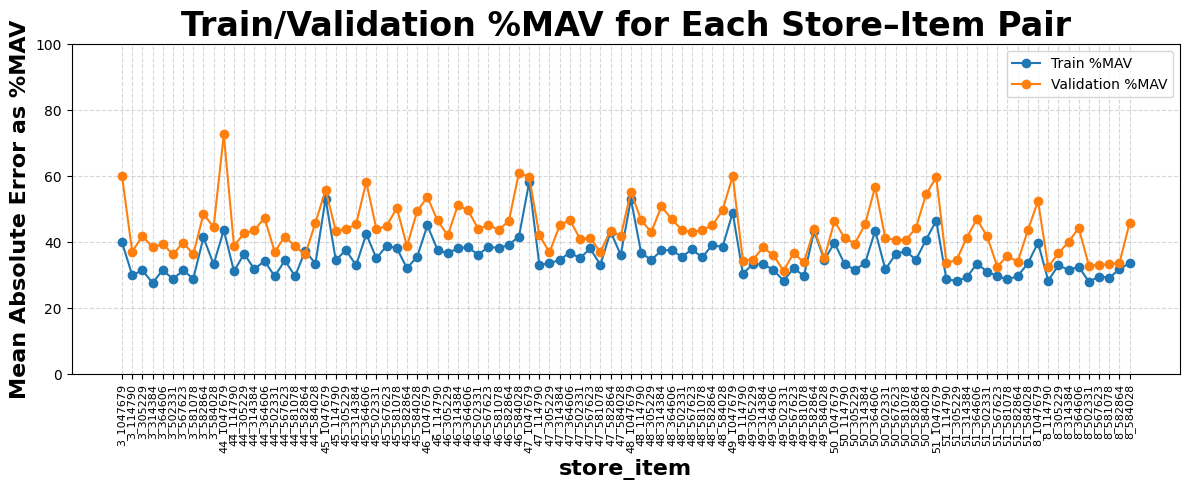

In [32]:
plot_final_percent_mav_per_sid(summary_df, title="Train/Validation %MAV for Each Store–Item Pair", 
                               fn="../output/figures/20250611_ResidualMLP_final_percent_mav_per_sid.tiff", y_lim=(0, 100))


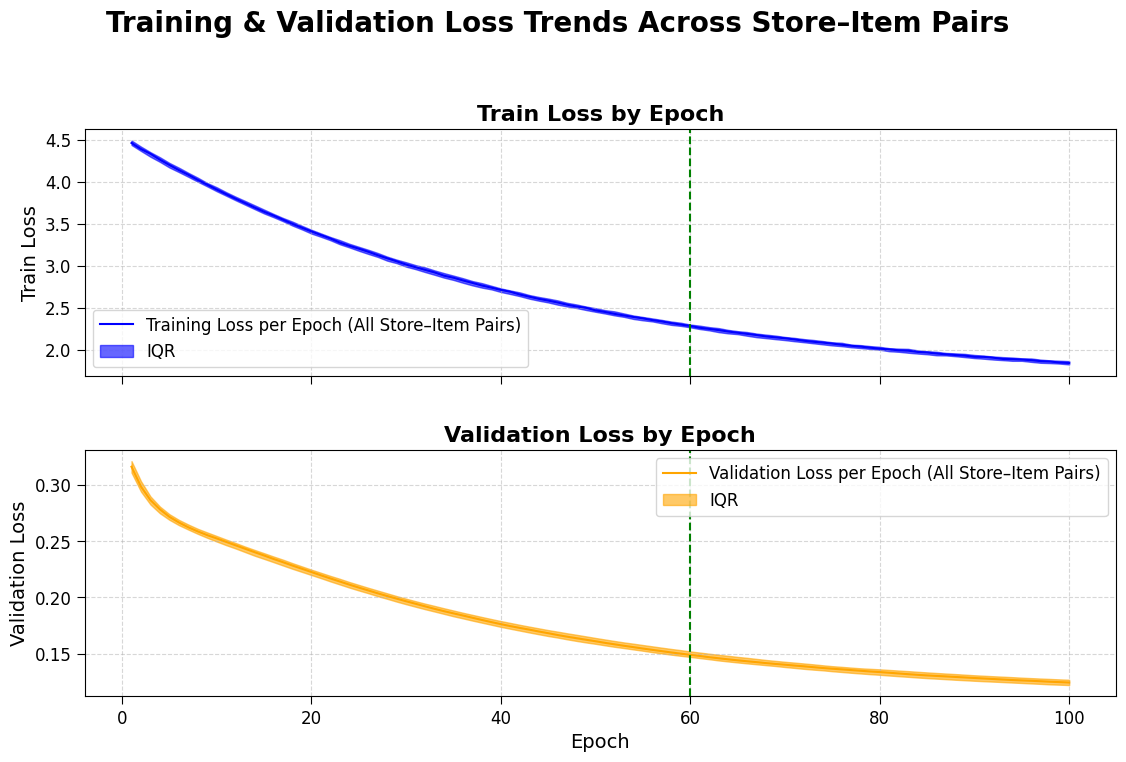

In [33]:
# plot_all_sids_losses(hist_df, 
#                      overall_title="Loss Curves for All Store Items",
# fn=f"../output/figures/all_sids_loss_curves_{today_str}.tiff")
plot_median_iqr_loss(hist_df, 
                     overall_title="Training & Validation Loss Trends Across Store–Item Pairs",
                     xvline=60,
fn=f"../output/figures/20250611_ResidualMLP_median_iqr_loss_curves_{today_str}.tiff")


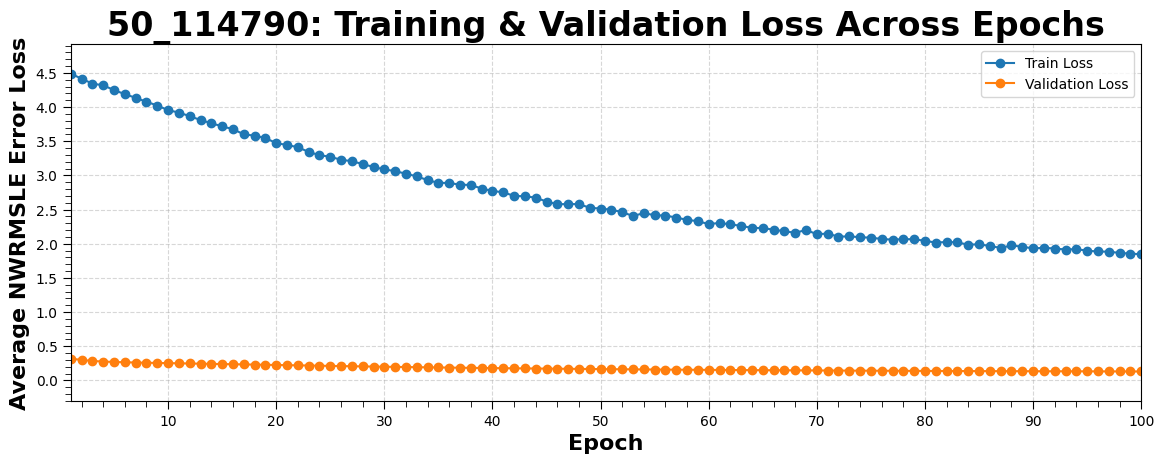

In [34]:
# to plot a single sid:
sid = "50_114790"
title = f"{sid}: Training & Validation Loss Across Epochs"
plot_loss_per_sid(hist_df, title = title,  
                  sid=sid, fn=f"../output/figures/20250611_ResidualMLP_loss_curves_{sid}.tiff",
                  train_col="train_loss", test_col="test_loss", y_label="Average NWRMSLE Error Loss")

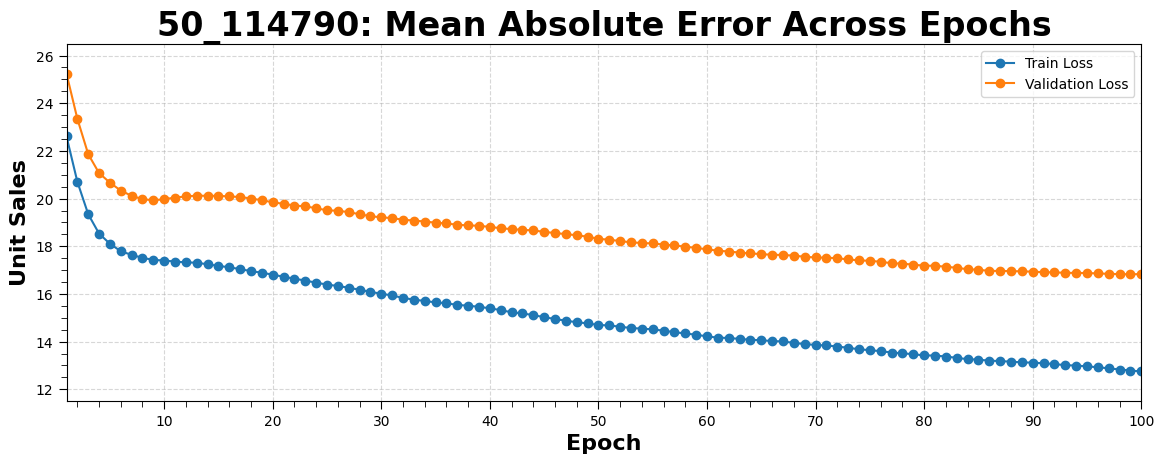

In [35]:
sid = "50_114790"
title = f"{sid}: Mean Absolute Error Across Epochs"
plot_loss_per_sid(hist_df, title=title, 
                  sid=sid, fn=f"../output/figures/20250611_ResidualMLP_loss_curves_mae_{sid}.tiff", 
                  train_col="train_mae", test_col="test_mae", y_label="Unit Sales")